In [1]:
import new_analysis_utils as au
import new_plot_utils as pu

In [2]:
%load_ext autoreload
%autoreload 2

In [15]:
from fractions import Fraction
round(219087*float(Fraction(2))*0.45644)

200000

In [9]:
import os,glob,h5py
import numpy as np
dirInput = "/storage/agrp/yuvalzu/NPLM/NPLM_package/training_outcomes/"
dir = dirInput
extract_file_Yuval = dirInput + f'ch-gauss_epochs-150000_architecture-2:5:1_NPLM-True_WC-1.35_Sig_loc-1.5_Sig_scale-0.1_poiss-True_CP-0.45644_ND-10000_0signals_1:10Ref_1:10Bkg.tar.gz'
os.system(f'tar --force-local -xzf {extract_file_Yuval} -C {dir}extract_here')
files = glob.glob(f"{dir}extract_here/*weights*")

#files = glob.glob(f"{dir}extract_here/*weights*")
# for seed in [317837]:
#     files.append(glob.glob(f"{dir}extract_here/*seed{seed}_*weights*"))
#     files_history.append(glob.glob(f"{dir}extract_here/*seed{seed}_*TAU_history*"))

dense_0_biases_NPLM = {0:[],1:[],2:[],3:[],4:[]}
dense_0_kernels_NPLM = {"0-0":[],"0-1":[],"0-2":[],"0-3":[],"0-4":[],"1-0":[],"1-1":[],"1-2":[],"1-3":[],"1-4":[]}
dense_1_biases_NPLM = {0:[]}
dense_1_kernels_NPLM = {"0-0":[],"1-0":[],"2-0":[],"3-0":[],"4-0":[]}

for filename in files:
    with h5py.File(filename, "r") as f:
        bs_mfinder_net = f.get("bs_mfinder_net")
        dense = bs_mfinder_net.get("dense")
        # show weights in the first layer
        kernel_0 = dense.get("kernel:0")
        bias_0 = dense.get("bias:0")
        kernel_1 = bs_mfinder_net.get("dense_1").get("kernel:0")
        bias_1 = bs_mfinder_net.get("dense_1").get("bias:0")
        dense_1_biases_NPLM[0].append(bias_1[0])
        for i in range(5):
            dense_0_biases_NPLM[i].append(bias_0[i])
            dense_1_kernels_NPLM[f"{i}-0"].append(kernel_1[i][0])
            for j in range(2):
                dense_0_kernels_NPLM[f"{j}-{i}"].append(kernel_0[j][i])
        
print(dense_0_biases_NPLM, dense_0_kernels_NPLM, dense_1_biases_NPLM, dense_1_kernels_NPLM)
        

{0: [4.4412246, 0.9341293, -1.8648456, -9.211762, 5.9016004, 2.498413, 0.8342678, -3.3723822, -7.6594768, -0.93517834, -1.6036527, 3.6380336, -2.7721746, -3.6610649, 2.4688835, -5.451676, 2.3026354, 0.2137596, 5.0045924, 2.4483042, 7.5446386, -4.077162, -2.7657342, 0.40980607, -0.27227563, -12.222588, 1.0648346, 1.7981203, -0.9465522, -11.564821, 8.856567, 6.152517, -0.76547956, -5.77762, 1.8206372, -8.254259, -3.855967, 3.3297057, 9.616148, -10.576447, -10.793514, 2.5552113, 5.377278, -4.447932, -0.42154074, -5.4276958, 1.0078683, 10.427064, -0.3589802, -11.319557, -4.6536856, -2.5360825, 0.28474018, -2.3085973, -6.017914, -1.063067, 3.756377, 2.7251804, -9.370611, 1.9750462, -9.883333, -1.8594882, -3.2676816, 1.6110603, 5.411187, -1.7941102, 1.6849109, 1.4773291, -9.95449, 5.197723, 5.3683047, -1.4635684, -1.4108948, -0.18737492, -0.78041005, -0.9636998, 2.111142, -0.11987526, -1.216057, 2.5113842, 0.96978325, 0.352672, 0.38231796, 4.8095107, -5.230111, -2.3096032, 1.3145208, 7.83771

In [10]:
dense_1_kernels_NPLM

{'0-0': [0.75724566,
  1.35,
  0.756134,
  1.35,
  -1.35,
  -0.9922513,
  -0.2666441,
  1.35,
  -0.95874816,
  0.38720152,
  1.35,
  0.47422647,
  -0.89088356,
  1.35,
  -0.7330879,
  1.35,
  -0.7021088,
  0.61179674,
  -1.35,
  1.35,
  1.35,
  1.35,
  -1.1412488,
  -1.0033305,
  1.35,
  -1.35,
  1.35,
  -0.9859508,
  0.56664914,
  -1.35,
  1.35,
  -0.6654845,
  1.2118629,
  0.5813029,
  -0.39246634,
  0.4004893,
  1.35,
  -0.8281434,
  1.35,
  1.35,
  1.35,
  0.70889896,
  0.44946364,
  1.35,
  -1.35,
  -1.35,
  -1.35,
  -1.35,
  1.0634532,
  1.35,
  1.35,
  -0.7197435,
  1.0301812,
  1.3302107,
  1.35,
  -1.35,
  1.35,
  -1.35,
  1.35,
  0.8776547,
  1.35,
  -0.64534307,
  -1.0756007,
  1.35,
  -1.2300313,
  1.35,
  -1.35,
  1.1542722,
  -0.45180932,
  1.35,
  1.35,
  -1.329278,
  -0.811728,
  -0.8358482,
  -1.35,
  -1.2076924,
  -1.35,
  1.3498268,
  -1.35,
  -0.8572588,
  1.35,
  -1.35,
  -1.35,
  0.23163173,
  -1.306171,
  1.35,
  -1.35,
  -1.35,
  1.35,
  -1.35,
  -1.35,
  -1.312

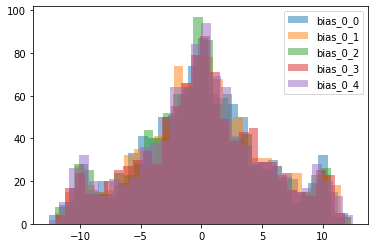

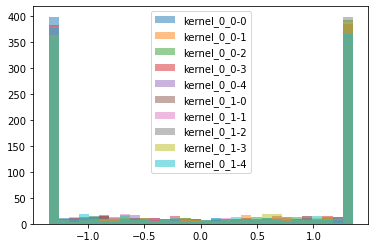

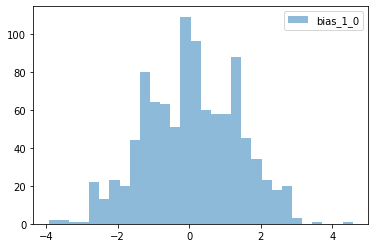

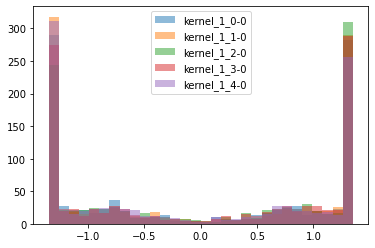

In [11]:
import matplotlib.pyplot as plt

for b in dense_0_biases_NPLM:
    plt.hist(dense_0_biases_NPLM[b], bins=30, alpha=0.5, label=f"bias_0_{b}")
plt.legend()
plt.show()
for k in dense_0_kernels_NPLM:
    plt.hist(dense_0_kernels_NPLM[k], bins=30, alpha=0.5, label=f"kernel_0_{k}")
plt.legend()
plt.show()
for b in dense_1_biases_NPLM:
    plt.hist(dense_1_biases_NPLM[b], bins=30, alpha=0.5, label=f"bias_1_{b}")
plt.legend()
plt.show()
for k in dense_1_kernels_NPLM:
    plt.hist(dense_1_kernels_NPLM[k], bins=30, alpha=0.5, label=f"kernel_1_{k}")
plt.legend()
plt.show()

In [13]:
import os,glob,h5py
import numpy as np
dirInput = "/storage/agrp/yuvalzu/NPLM/NPLM_package/training_outcomes/"
dir = dirInput
extract_file_Yuval = dirInput + f'ch-em_vars-Mcoll:Lep0Pt_sig_types-ggH_taue:vbfH_taue_epochs-500000_architecture-2:4:1_WC-None_poiss-True_CP-0.05_0signals_1:2Ref_1:2Bkg.tar.gz'
os.system(f'tar --force-local -xzf {extract_file_Yuval} -C {dir}extract_here')
files = glob.glob(f"{dir}extract_here/*weights*")

#files = glob.glob(f"{dir}extract_here/*weights*")
# for seed in [317837]:
#     files.append(glob.glob(f"{dir}extract_here/*seed{seed}_*weights*"))
#     files_history.append(glob.glob(f"{dir}extract_here/*seed{seed}_*TAU_history*"))

dense_0_biases = {0:[],1:[],2:[],3:[],4:[]}
dense_0_kernels = {"0-0":[],"0-1":[],"0-2":[],"0-3":[],"1-0":[],"1-1":[],"1-2":[],"1-3":[]}
dense_1_biases = {0:[]}
dense_1_kernels = {"0-0":[],"1-0":[],"2-0":[],"3-0":[]}

for filename in files:
    with h5py.File(filename, "r") as f:
        bs_mfinder_net = f.get("bs_mfinder_net")
        dense = bs_mfinder_net.get("dense")
        # show weights in the first layer
        kernel_0 = dense.get("kernel:0")
        bias_0 = dense.get("bias:0")
        kernel_1 = bs_mfinder_net.get("dense_1").get("kernel:0")
        bias_1 = bs_mfinder_net.get("dense_1").get("bias:0")
        dense_1_biases[0].append(bias_1[0])
        for i in range(4):
            dense_0_biases[i].append(bias_0[i])
            dense_1_kernels[f"{i}-0"].append(kernel_1[i][0])
            for j in range(2):
                dense_0_kernels[f"{j}-{i}"].append(kernel_0[j][i])
        
print(dense_0_biases, dense_0_kernels, dense_1_biases, dense_1_kernels)
        

{0: [0.5722015, 4.4412246, 76.96467, -56.747303, 4.3206296, -1.2993685, 0.9341293, 162.5035, 395.87427, -79.07062, -1.8648456, -9.211762, 5.9016004, -2.1031175, 0.23522979, 13.582033, -4.7334366, 0.05269293, -0.3156642, -1.6035087, -8.901703, -8.435754, 5.155423, -2.2342498, 4.3691707, 2.7144785, -484.17508, 2.498413, 0.98339295, 0.8342678, -4.730498, -3.3723822, -26.180555, -8.931728, -7.6594768, 310.26614, 6.248779, -11.268643, 1.2746718, -0.93517834, -1.6036527, -8.889631, 3.6380336, 387.7561, 316.74722, -2.7721746, -11.557909, -7.3541074, 0.33196074, -3.6610649, 24.164545, -472.88452, -6.521072, 339.16467, -150.40938, 2.4688835, 2.6464674, -13.176109, -3.1846237, -1.161417, -5.451676, 3.037025, 2.3026354, 447.4986, 0.2137596, 3.969497, -0.59299576, 5.0045924, -10.633728, -2.4294524, 2.4483042, -424.0473, -1.2106812, 1.5276673, -0.5369101, 7.5446386, -4.077162, -360.45587, -0.91266656, -2.7657342, 14.239227, -6.40413, 0.40980607, -1.6964408, -4.0415454, -0.27227563, 0.15246868, -12.

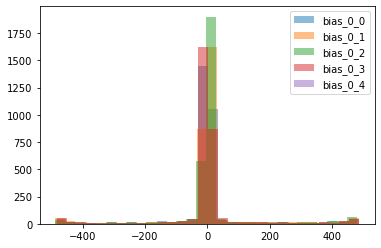

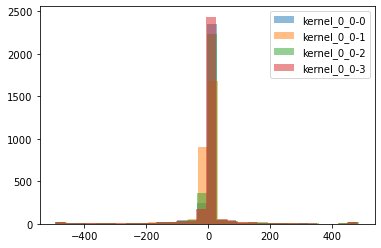

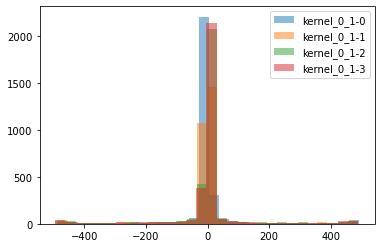

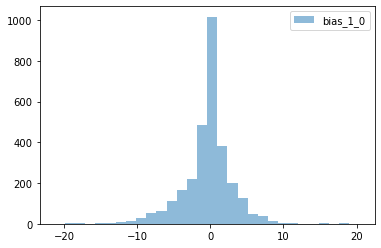

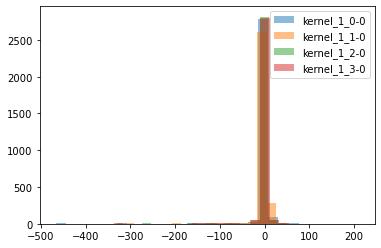

In [16]:
for b in dense_0_biases:
    plt.hist(dense_0_biases[b], bins=30, alpha=0.5, label=f"bias_0_{b}")
plt.legend()
plt.show()
for k in dense_0_kernels.keys():
    if k.startswith("0"):
        plt.hist(dense_0_kernels[k], bins=30, alpha=0.5, label=f"kernel_0_{k}")
plt.legend()
plt.show()
for k in dense_0_kernels.keys():
    if k.startswith("1"):
        plt.hist(dense_0_kernels[k], bins=30, alpha=0.5, label=f"kernel_0_{k}")
plt.legend()
plt.show()
for b in dense_1_biases:
    plt.hist(dense_1_biases[b], bins=30, alpha=0.5, label=f"bias_1_{b}")
plt.legend()
plt.show()
for k in dense_1_kernels:
    plt.hist(dense_1_kernels[k], bins=30, alpha=0.5, label=f"kernel_1_{k}")
plt.legend()
plt.show()

In [4]:
import os,glob,h5py
import numpy as np
dirInput = "/storage/agrp/yuvalzu/NPLM/NPLM_package/training_outcomes/"
dir = dirInput
extract_file_Yuval = dirInput + f'ch-gauss_epochs-150000_architecture-2:5:1_NPLM-True_WC-1.35_Sig_loc-1.5_Sig_scale-0.1_poiss-True_CP-0.45644_ND-10000_0signals_1:10Ref_1:10Bkg.tar.gz'
os.system(f'tar --force-local -xzf {extract_file_Yuval} -C {dir}extract_here')
files = glob.glob(f"{dir}extract_here/*weights*")
files_history = []
#files = glob.glob(f"{dir}extract_here/*weights*")
# for seed in [317837]:
#     files.append(glob.glob(f"{dir}extract_here/*seed{seed}_*weights*"))
#     files_history.append(glob.glob(f"{dir}extract_here/*seed{seed}_*TAU_history*"))

dense_biases = {0:[],1:[],2:[],3:[]}
dense_kernels = {0:[],1:[],2:[],3:[]}
dense_1_biases = {0:[]}
dense_1_kernels = {0:[],1:[],2:[],3:[]} 
tau_history= []
for filename in files:
    with h5py.File(filename, "r") as f:
        file_items = list(f.items())
        bs_mfinder_net = f.get("bs_mfinder_net")
        bs_mfinder_net_items = list(bs_mfinder_net.items())
        dense = bs_mfinder_net.get("dense")
        dense_items = list(dense.items())
        # 1st biases?
        dense_bias = dense.get("bias:0")
        # 1st weights?
        dense_kernel = dense.get("kernel:0")
        dense_1 = bs_mfinder_net.get("dense_1") 
        dense_1_items = list(dense_1.items())
        # 2nd biases?
        dense_1_bias = dense_1.get("bias:0")
        # 2nd weights?
        dense_1_kernel = dense_1.get("kernel:0")
        dense_1_biases[0].append(np.array(dense_1_bias)[0])
        for i in range(4):
            dense_biases[i].append(np.array(dense_bias)[i])
            dense_kernels[i].append(np.array(dense_kernel)[0][i])
            dense_1_kernels[i].append(np.array(dense_1_kernel)[i][0])
for filename in files_history:      
    with h5py.File(filename[0], "r") as f:
            epochs_check  = [(key) for key in list(f.keys())]
            t = f.get(str(epochs_check[2]))#'loss'
            t = np.array(t)
            f.close()
            tau_history.append(t)
            #file_items = list(f.items())
tau_history=np.array(tau_history)
os.system(f'rm -r {dir}extract_here/*.h5')


0

In [8]:
print(len(dense_1_kernels.keys()))

4


In [ ]:
print(tau_history)

[]


In [ ]:
sig_check1 = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss600signals_1:2Ref_1:2Bkg.csv')
sig_check1.get_sqrt_q0()

6.045945500558497

In [3]:
em_bkg_30_ifb = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_3:4Ref_3:4Bkg.csv')
em_bkg_25_ifb = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_5:8Ref_5:8Bkg.csv')
em_bkg_20_ifb = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1:2Ref_1:2Bkg.csv')
em_bkg_15_ifb = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_3:8Ref_3:8Bkg.csv')
em_bkg_10_ifb = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1:4Ref_1:4Bkg.csv')
em_bkg_5_ifb = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1:8Ref_1:8Bkg.csv')


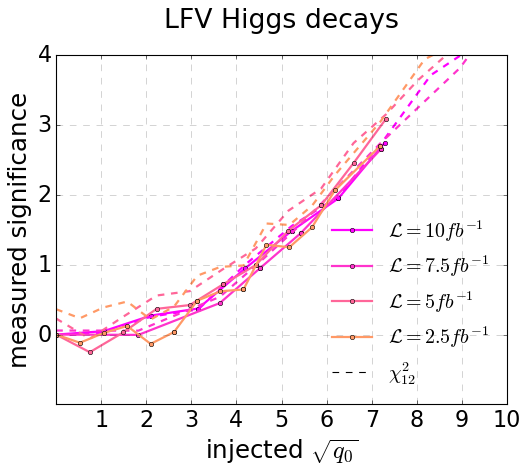

In [31]:
pu.em_performance_plot([em_bkg_20_ifb, em_bkg_15_ifb, em_bkg_10_ifb, em_bkg_5_ifb], legend_fs=18,
                        title='LFV Higgs decays', save=True, saved_file_name='performance_plot_em_remastered', save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


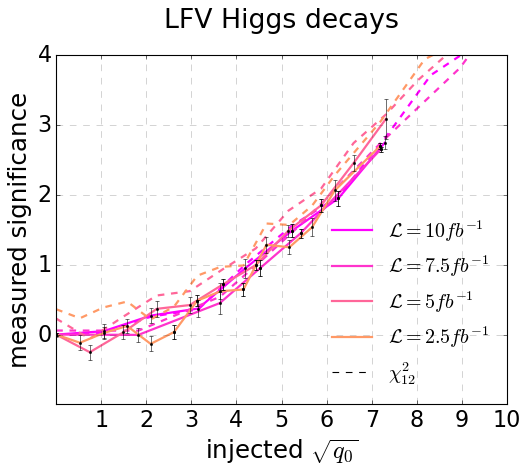

In [29]:
pu.em_performance_plot([em_bkg_20_ifb, em_bkg_15_ifb, em_bkg_10_ifb, em_bkg_5_ifb], legend_fs=18,
                        title='LFV Higgs decays', save=True, saved_file_name='performance_plot_em_remastered_symmetrical_errors', save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/', errors=True)

In [36]:
em_sig_5_ifb_125 = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss125signals_1:8Ref_1:8Bkg.csv')
au.get_z_score(em_sig_5_ifb_125,em_bkg_5_ifb)

(-0.02256156839022472,
 array([24.086011, 24.644138,  8.679959,  6.440122, 10.081777, 13.242705,
        19.780022, 22.254005, 25.521263, 28.841423, 15.248164, 18.912876,
        14.198978,  8.534328, 13.621368, 25.520117, 20.60058 , 10.397559,
        18.271598,  7.33132 , 22.706594,  6.091762, 15.664711, 12.78794 ,
        15.211028, 18.820637,  9.691046, 12.506013,  9.381217, 11.845292,
        12.262625, 14.941852,  8.3567  , 12.783888, 11.360202, 12.942848,
        31.31907 , 14.494203, 26.062926, 11.801765,  2.773934,  7.43102 ,
        20.777252,  5.574708, 13.449247, 15.274761, 24.518555, 10.447527,
        11.405495,  5.850826,  4.610369,  9.97141 , 12.165655, 21.61891 ,
        14.583672, 14.289289,  7.572741, 12.416707, 21.011615,  7.992728,
        27.338623,  5.601484,  7.925316, 19.621174, 24.77923 , 16.659191,
        14.489429,  9.033528, 30.790537, 14.496537, 12.607209, 15.41122 ,
        11.275878, 16.283288, 12.994405, 13.104112, 26.309302, 16.668889,
        18.7416

900
900
750
750
600
600
450
450
300
300
150
150


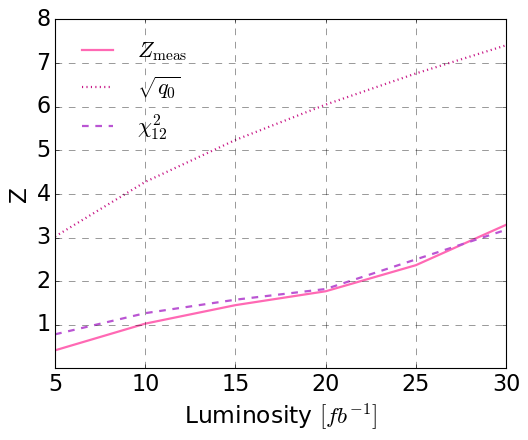

In [28]:
pu.em_luminosity_plot([em_bkg_30_ifb, em_bkg_25_ifb, em_bkg_20_ifb, em_bkg_15_ifb, em_bkg_10_ifb, em_bkg_5_ifb],600)

750
750
500
500
375
375
250
250
125
125


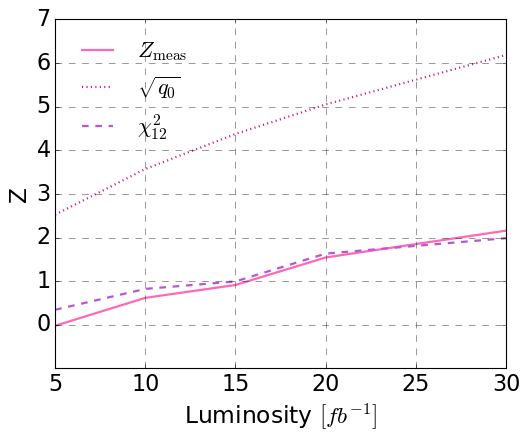

In [16]:
pu.em_luminosity_plot([em_bkg_30_ifb, em_bkg_20_ifb, em_bkg_15_ifb, em_bkg_10_ifb, em_bkg_5_ifb],500)

2100
1400
1400
1050
700
700
350
350


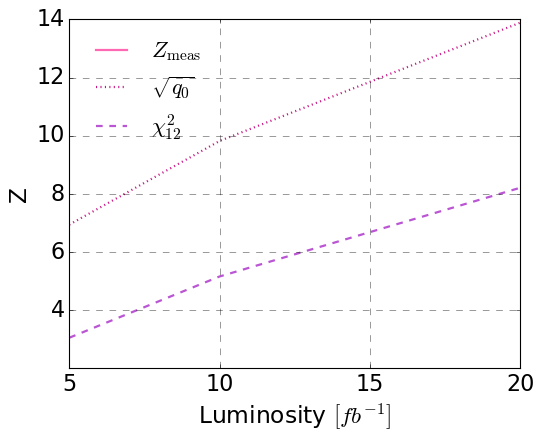

In [22]:
pu.em_luminosity_plot([em_bkg_30_ifb, em_bkg_20_ifb, em_bkg_15_ifb, em_bkg_10_ifb, em_bkg_5_ifb],1400)

In [4]:
em_sig_30_ifb = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss900signals_3:4Ref_3:4Bkg.csv')
em_sig_25_ifb = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss750signals_5:8Ref_5:8Bkg.csv')
em_sig_20_ifb = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss600signals_1:2Ref_1:2Bkg.csv')
em_sig_15_ifb = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss450signals_3:8Ref_3:8Bkg.csv')
em_sig_10_ifb = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss300signals_1:4Ref_1:4Bkg.csv')
em_sig_5_ifb = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss150signals_1:8Ref_1:8Bkg.csv')

In [5]:
em_sig_30_ifb_new = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss750signals_3:4Ref_3:4Bkg.csv')
em_sig_25_ifb_new = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss625signals_5:8Ref_5:8Bkg.csv')
em_sig_20_ifb_new = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss500signals_1:2Ref_1:2Bkg.csv')
em_sig_15_ifb_new = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss375signals_3:8Ref_3:8Bkg.csv')
em_sig_10_ifb_new = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss250signals_1:4Ref_1:4Bkg.csv')
em_sig_5_ifb_new = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss125signals_1:8Ref_1:8Bkg.csv')

In [6]:
em_sig_30_ifb_new_2 = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss2100signals_3:4Ref_3:4Bkg.csv')
em_sig_25_ifb_new_2 = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss1750signals_5:8Ref_5:8Bkg.csv')
em_sig_20_ifb_new_2 = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss1400signals_1:2Ref_1:2Bkg.csv')
em_sig_15_ifb_new_2 = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss1050signals_3:8Ref_3:8Bkg.csv')
em_sig_10_ifb_new_2 = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss700signals_1:4Ref_1:4Bkg.csv')
em_sig_5_ifb_new_2 = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss350signals_1:8Ref_1:8Bkg.csv')

In [7]:
em_sig_30_ifb_new_3 = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss1200signals_3:4Ref_3:4Bkg.csv')
em_sig_25_ifb_new_3 = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss1000signals_5:8Ref_5:8Bkg.csv')
em_sig_20_ifb_new_3 = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss800signals_1:2Ref_1:2Bkg.csv')
em_sig_15_ifb_new_3 = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss600signals_3:8Ref_3:8Bkg.csv')
em_sig_10_ifb_new_3 = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss400signals_1:4Ref_1:4Bkg.csv')
em_sig_5_ifb_new_3 = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss200signals_1:8Ref_1:8Bkg.csv')

/usr/local/anaconda/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/anaconda/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


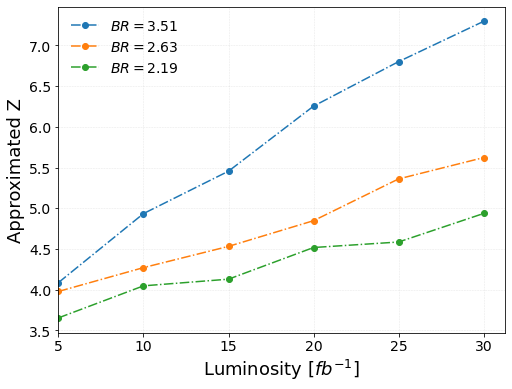

In [39]:
import matplotlib.pyplot as plt, numpy as np
from scipy.stats import chi2,norm
z_array_1 = [norm.ppf(chi2.cdf(np.median(i), df=1)) for i in [em_sig_5_ifb.read_final_t_csv()[0], em_sig_10_ifb.read_final_t_csv()[0], em_sig_15_ifb.read_final_t_csv()[0], em_sig_20_ifb.read_final_t_csv()[0], em_sig_25_ifb.read_final_t_csv()[0], em_sig_30_ifb.read_final_t_csv()[0]]]
z_array_2 = [norm.ppf(chi2.cdf(np.median(i), df=1)) for i in [em_sig_5_ifb_new.read_final_t_csv()[0], em_sig_10_ifb_new.read_final_t_csv()[0], em_sig_15_ifb_new.read_final_t_csv()[0], em_sig_20_ifb_new.read_final_t_csv()[0], em_sig_25_ifb_new.read_final_t_csv()[0], em_sig_30_ifb_new.read_final_t_csv()[0]]]
z_array_3 = [norm.ppf(chi2.cdf(np.median(i), df=1)) for i in [em_sig_5_ifb_new_2.read_final_t_csv()[0], em_sig_10_ifb_new_2.read_final_t_csv()[0], em_sig_15_ifb_new_2.read_final_t_csv()[0], em_sig_20_ifb_new_2.read_final_t_csv()[0], em_sig_25_ifb_new_2.read_final_t_csv()[0], em_sig_30_ifb_new_2.read_final_t_csv()[0]]]
z_array_4 = [norm.ppf(chi2.cdf(np.median(i), df=1)) for i in [em_sig_5_ifb_new_3.read_final_t_csv()[0], em_sig_10_ifb_new_3.read_final_t_csv()[0], em_sig_15_ifb_new_3.read_final_t_csv()[0], em_sig_20_ifb_new_3.read_final_t_csv()[0], em_sig_25_ifb_new_3.read_final_t_csv()[0], em_sig_30_ifb_new_3.read_final_t_csv()[0]]]
t_array_1 = [np.median(i) for i in [em_sig_5_ifb.read_final_t_csv()[0], em_sig_10_ifb.read_final_t_csv()[0], em_sig_15_ifb.read_final_t_csv()[0], em_sig_20_ifb.read_final_t_csv()[0], em_sig_25_ifb.read_final_t_csv()[0], em_sig_30_ifb.read_final_t_csv()[0]]]
t_array_2 = [np.median(i) for i in [em_sig_5_ifb_new.read_final_t_csv()[0], em_sig_10_ifb_new.read_final_t_csv()[0], em_sig_15_ifb_new.read_final_t_csv()[0], em_sig_20_ifb_new.read_final_t_csv()[0], em_sig_25_ifb_new.read_final_t_csv()[0], em_sig_30_ifb_new.read_final_t_csv()[0]]]
t_array_3 = [np.median(i) for i in [em_sig_5_ifb_new_2.read_final_t_csv()[0], em_sig_10_ifb_new_2.read_final_t_csv()[0], em_sig_15_ifb_new_2.read_final_t_csv()[0], em_sig_20_ifb_new_2.read_final_t_csv()[0], em_sig_25_ifb_new_2.read_final_t_csv()[0], em_sig_30_ifb_new_2.read_final_t_csv()[0]]]
t_array_4 = [np.median(i) for i in [em_sig_5_ifb_new_3.read_final_t_csv()[0], em_sig_10_ifb_new_3.read_final_t_csv()[0], em_sig_15_ifb_new_3.read_final_t_csv()[0], em_sig_20_ifb_new_3.read_final_t_csv()[0], em_sig_25_ifb_new_3.read_final_t_csv()[0], em_sig_30_ifb_new_3.read_final_t_csv()[0]]]
q0_array_1 = np.array([i for i in [em_sig_5_ifb.get_binned_sqrt_q0(), em_sig_10_ifb.get_binned_sqrt_q0(), em_sig_15_ifb.get_binned_sqrt_q0(), em_sig_20_ifb.get_binned_sqrt_q0(), em_sig_25_ifb.get_binned_sqrt_q0(), em_sig_30_ifb.get_binned_sqrt_q0()]])
q0_array_2 = np.array([i for i in [em_sig_5_ifb_new.get_binned_sqrt_q0(), em_sig_10_ifb_new.get_binned_sqrt_q0(), em_sig_15_ifb_new.get_binned_sqrt_q0(), em_sig_20_ifb_new.get_binned_sqrt_q0(), em_sig_25_ifb_new.get_binned_sqrt_q0(), em_sig_30_ifb_new.get_binned_sqrt_q0()]])
q0_array_3 = np.array([i for i in [em_sig_5_ifb_new_2.get_binned_sqrt_q0(), em_sig_10_ifb_new_2.get_binned_sqrt_q0(), em_sig_15_ifb_new_2.get_binned_sqrt_q0(), em_sig_20_ifb_new_2.get_binned_sqrt_q0(), em_sig_25_ifb_new_2.get_binned_sqrt_q0(), em_sig_30_ifb_new_2.get_binned_sqrt_q0()]])
q0_array_4 = np.array([i for i in [em_sig_5_ifb_new_3.get_binned_sqrt_q0(), em_sig_10_ifb_new_3.get_binned_sqrt_q0(), em_sig_15_ifb_new_3.get_binned_sqrt_q0(), em_sig_20_ifb_new_3.get_binned_sqrt_q0(), em_sig_25_ifb_new_3.get_binned_sqrt_q0(), em_sig_30_ifb_new_3.get_binned_sqrt_q0()]])
# t_array = [np.median(i) for i in [em_sig_5_ifb.read_final_t_csv()[0], em_sig_10_ifb.read_final_t_csv()[0], em_sig_15_ifb.read_final_t_csv()[0], em_sig_20_ifb.read_final_t_csv()[0], em_sig_25_ifb.read_final_t_csv()[0], em_sig_30_ifb.read_final_t_csv()[0]]]
# t_array_new = [np.median(i) for i in [em_sig_5_ifb_new.read_final_t_csv()[0], em_sig_10_ifb_new.read_final_t_csv()[0], em_sig_15_ifb_new.read_final_t_csv()[0], em_sig_20_ifb_new.read_final_t_csv()[0], em_sig_30_ifb_new.read_final_t_csv()[0]]]
lumi_array_1 = [5,10,15,20,25,30]
lumi_array_2 = [5,10,15,20,25,30]
lumi_array_3 = [5,10,15,20,25,30]
lumi_array_4 = [5,10,15,20,25,30]
plt.figure(figsize=(8,6),facecolor='w')
# plt.plot(lumi_array_3, t_array_3, ls='-.', marker='o', label = f"$BR = {(40*1/456)*em_sig_5_ifb_new_2.Sig_events/(40*em_sig_5_ifb_new_2.Bkg_ratio):.2f}$")
plt.plot(lumi_array_4, np.sqrt(t_array_4), ls='-.', marker='o', label = f"$BR = {(40*1/456)*em_sig_5_ifb_new_3.Sig_events/(40*em_sig_5_ifb_new_3.Bkg_ratio):.2f}$")
plt.plot(lumi_array_1, np.sqrt(t_array_1), ls='-.', marker='o', label = f"$BR = {(40*1/456)*em_sig_5_ifb.Sig_events/(40*em_sig_5_ifb.Bkg_ratio):.2f}$")
plt.plot(lumi_array_2, np.sqrt(t_array_2), ls='-.', marker='o', label = f"$BR = {(40*1/456)*em_sig_5_ifb_new.Sig_events/(40*em_sig_5_ifb_new.Bkg_ratio):.2f}$")
# plt.plot(lumi_array_3, z_array_3, marker='o')
# plt.plot(lumi_array_4, z_array_4, marker='o', label = f"$BR = {(40*1/456)*em_sig_5_ifb_new_3.Sig_events/(40*em_sig_5_ifb_new_3.Bkg_ratio):.2f}$")
# plt.plot(lumi_array_1, z_array_1, marker='o', label = f"$BR = {(40*1/456)*em_sig_5_ifb.Sig_events/(40*em_sig_5_ifb.Bkg_ratio):.2f}$")
# plt.plot(lumi_array_2, z_array_2, marker='o', label = f"$BR = {(40*1/456)*em_sig_5_ifb_new.Sig_events/(40*em_sig_5_ifb_new.Bkg_ratio):.2f}$")
# plt.plot(lumi_array_4, q0_array_4**2, ls='--', marker='o', label = f"$BR = {(40*1/456)*em_sig_5_ifb_new_3.Sig_events/(40*em_sig_5_ifb_new_3.Bkg_ratio):.2f}$")
# plt.plot(lumi_array_1, q0_array_1**2, ls='--', marker='o', label = f"$BR = {(40*1/456)*em_sig_5_ifb.Sig_events/(40*em_sig_5_ifb.Bkg_ratio):.2f}$")
# plt.plot(lumi_array_2, q0_array_2**2, ls='--', marker='o', label = f"$BR = {(40*1/456)*em_sig_5_ifb_new.Sig_events/(40*em_sig_5_ifb_new.Bkg_ratio):.2f}$")
plt.xlabel(r'Luminosity $[fb^{-1}]$', fontsize=18)
plt.ylabel('Approximated Z', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
# plt.yscale('log')
# plt.xscale('log')
plt.xlim(left=5)
plt.legend(frameon=False, fontsize=14)
# plt.ylim(top=35)
# for i in range(1,len(t_array)):
#     plt.text(lumi_array[i]-4, t_array[i], f'({lumi_array[i]},{t_array[i]:.1f})')
# plt.text(lumi_array[0]+1, t_array[0], f'({lumi_array[0]},{t_array[0]:.1f})')         
plt.show()

In [33]:
(3.51/2.19)**2

2.5687746293863762

In [35]:
(t_array_4[-1]-t_array_4[0])/(t_array_1[-1]-t_array_1[0])

2.314002924839977

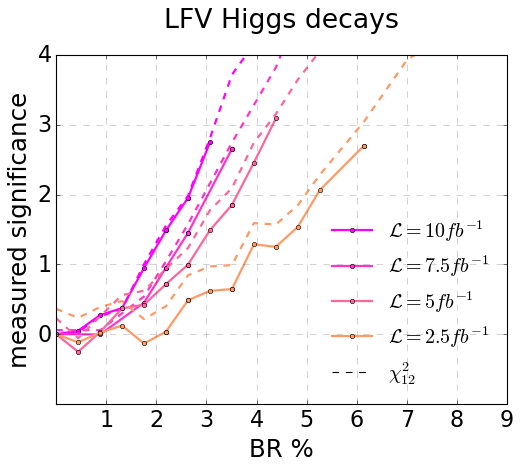

In [33]:
BR_list, Z_list = pu.em_performance_plot_BR([em_bkg_20_ifb, em_bkg_15_ifb, em_bkg_10_ifb, em_bkg_5_ifb], legend_fs=18, errors=False,
                        title='LFV Higgs decays', save=True, saved_file_name='performance_plot_BR_em_remastered', save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


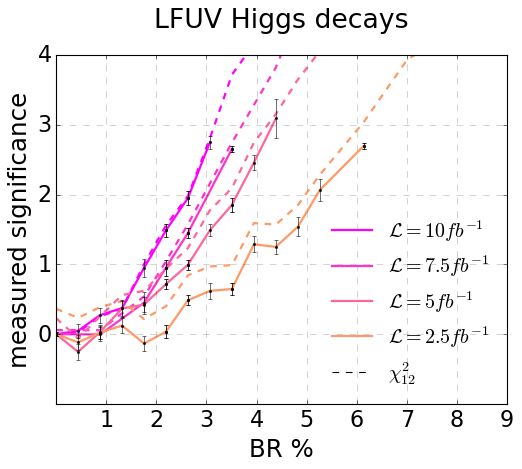

In [9]:
BR_list, Z_list = pu.em_performance_plot_BR([em_bkg_20_ifb, em_bkg_15_ifb, em_bkg_10_ifb, em_bkg_5_ifb], legend_fs=18, errors=True,
                        title='LFUV Higgs decays', save=True, saved_file_name='performance_plot_BR_em_remastered_symmetrical_errors', save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

In [41]:
BR_list

[array([0.        , 0.43859649, 0.87719298, 1.31578947, 1.75438596,
        2.19298246, 2.63157895, 3.07017544, 3.50877193, 3.94736842,
        4.38596491, 4.8245614 , 5.26315789, 6.14035088, 7.01754386,
        7.89473684, 8.77192982]),
 array([0.        , 0.87719298, 1.75438596, 2.63157895, 3.50877193,
        4.38596491, 5.26315789, 5.84795322, 7.01754386, 8.77192982]),
 array([0.        , 0.43859649, 0.87719298, 1.31578947, 1.75438596,
        2.19298246, 2.63157895, 3.07017544, 3.50877193, 3.94736842,
        4.38596491, 4.8245614 , 5.26315789, 6.14035088, 7.01754386,
        7.89473684, 8.77192982]),
 array([0.        , 0.43859649, 0.87719298, 1.31578947, 1.75438596,
        2.19298246, 2.63157895, 3.07017544, 3.50877193, 3.94736842,
        4.38596491, 4.8245614 , 5.26315789, 6.14035088, 7.01754386,
        7.89473684, 8.77192982])]

In [34]:
#interpolation
import scipy.interpolate as interpolate
new_BR = BR_list[0]
new_Z = {}
for i in range(len(BR_list)):
    f = interpolate.interp1d(Z_list[i], BR_list[i])
    xnew = new_BR
    ynew = f(new_BR)
    new_Z[(i+1)*5] = ynew 

In [5]:
import json
dirInbar = "/srv01/tgrp/inbarsav/NPLM/NPLM_package/training_outcomes/"
scripts_dir_Inbar = '/srv01/tgrp/inbarsav/LFV_git/LFV_nn/LFV_nn/'
with open(f'{scripts_dir_Inbar}config18.json', 'r') as jsonfile:
    config = json.load(jsonfile)

with open('/srv01/tgrp/inbarsav/LFV_git/LFV_nn/LFV_nn/initial_config.json', 'r') as initialjsonfile:
    initial_config = json.load(initialjsonfile)

outdir = dirInbar
sample='exp'
signals = 0
train_size = ['1/2','1','1']#['1/2','1/4','1','1']
test_size = ['1/2','1/10','1/100']#['1/2','1/4','1/10','1/100']
OUTPUT_PATH = outdir
bkg_files=[]
for i in range(len(train_size)):
    if signals==0 and train_size[i]=='1':
        config_keys_bkg = ''
        for key in config.keys():
            if config[key]!=initial_config[key]:
                if ("Sig" in key) or ("resonant" in key):
                    config_keys_bkg+= ""
                else:
                    config_keys_bkg+= f"{config[key]}{key}"
        OUTPUT_FILE = sample + config_keys_bkg+f'{signals}signals_{train_size[i]}Ref_{test_size[i]}Bkg'.replace('/',':')
    else:
        OUTPUT_FILE = sample+''.join(list((f"{config[key]}{key}" if config[key]!=initial_config[key] else '' for key in config.keys())))+f'{signals}signals_{train_size[i]}Ref_{test_size[i]}Bkg'.replace('/',':')
    bkg_files.append(dirInbar+OUTPUT_FILE+'.tar.gz')

In [6]:
exps = []
for file in bkg_files:
    exps.append(au.exp_results(file))

exp1500000epochs_tau1500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant30signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant40signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500patience_tau500000epochs_delta500patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant60signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant70signa

/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant9signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant5signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant8signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant6signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant20signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant12signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBS

/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


exp1500000epochs_tau1500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissFalseresonant275signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissFalseresonant400signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissFalseresonant600signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500patience_tau500000epochs_delta500patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissFalseresonant1000signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_de

/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


exp1500000epochs_tau1500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant850signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant750signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500patience_tau500000epochs_delta500patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant400signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant900signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500patience_tau500000epochs_delta500patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant500s

/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant300signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant250signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant50signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant150signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant100signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant200signals_1Ref_1:10Bkg.csv
$2.19\times {10}^{5}$
$2.19\times {10}^{4}$
exp500000epochs

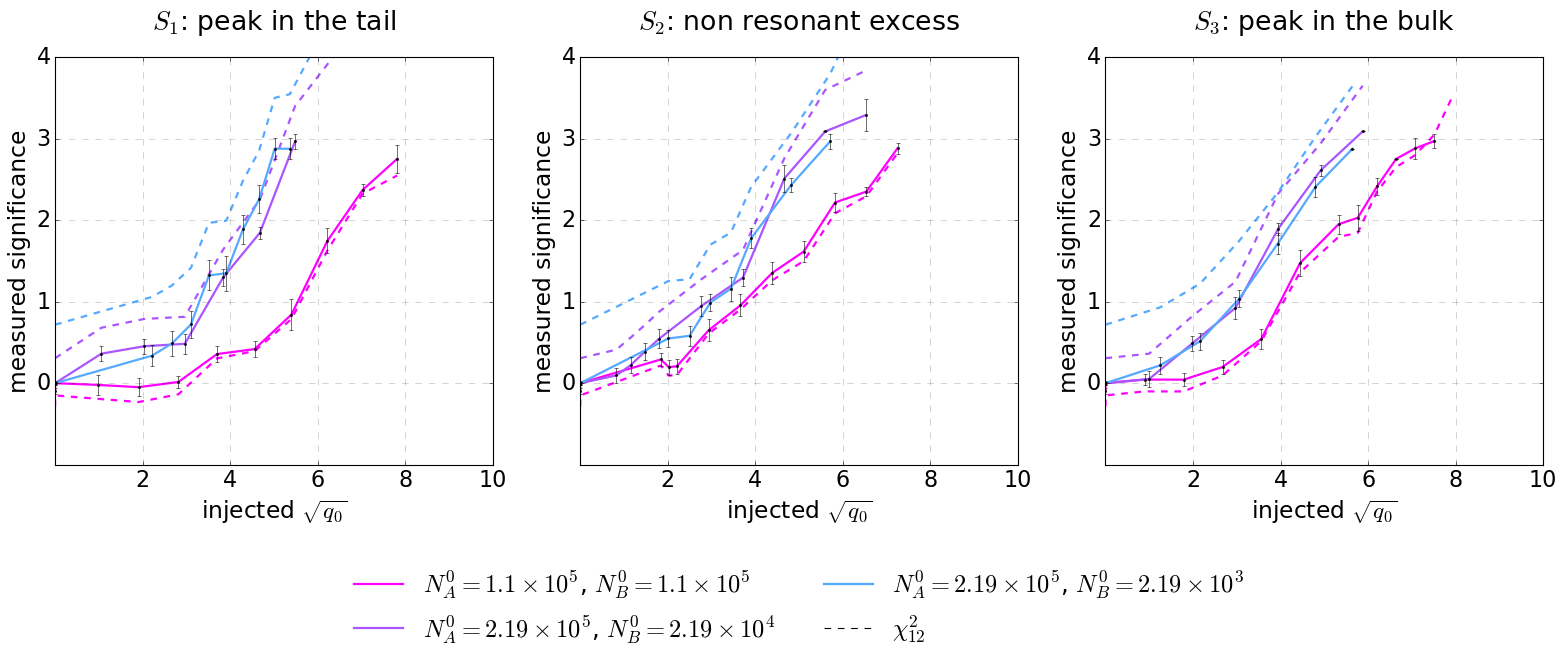

In [10]:
titles = [r"$S_1$: peak in the tail", r"$S_2$: non resonant excess", r"$S_3$: peak in the bulk"] #[r"exp background, $S_1$:peak in the tail", r"exp background, $S_2$:non resonant excess", r"exp background, $S_3$:peak in the bulk"]
pu.exp_multiple_performance_plot(exps,[1,2,3],title=titles,legend_fs=22,errors=True,save=True,saved_file_name='performance_plot_exp_remastered_symmetrical_errors',save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

exp1500000epochs_tau1500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant30signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant40signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500patience_tau500000epochs_delta500patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant60signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant70signa

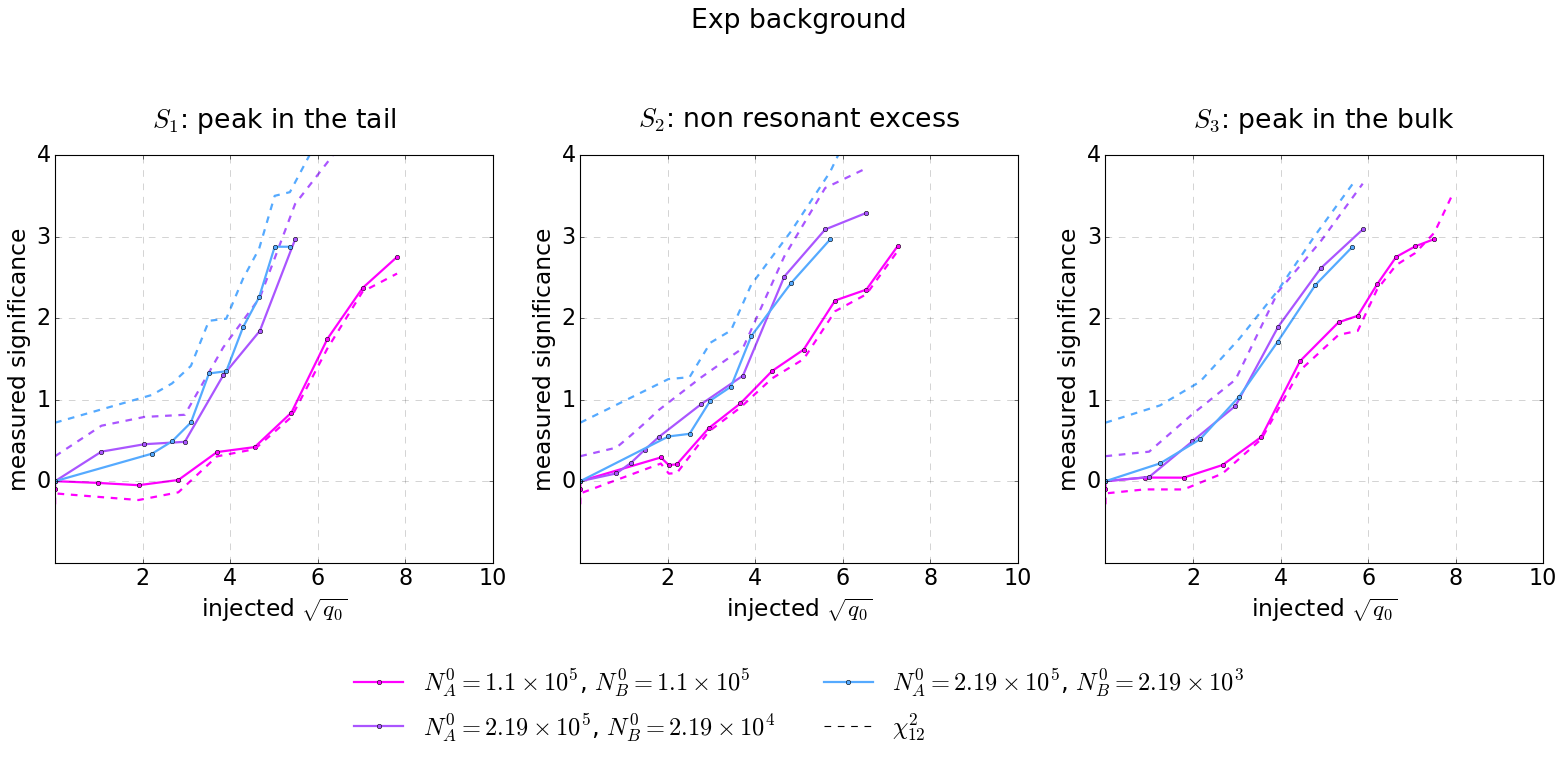

In [8]:
titles = [r"$S_1$: peak in the tail", r"$S_2$: non resonant excess", r"$S_3$: peak in the bulk"] #[r"exp background, $S_1$:peak in the tail", r"exp background, $S_2$:non resonant excess", r"exp background, $S_3$:peak in the bulk"]
pu.exp_multiple_performance_plot(exps,[1,2,3],title=titles,legend_fs=22,errors=False,save=True,saved_file_name='performance_plot_exp_remastered',save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant300signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant40signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant10signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant70signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant400signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant50signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant30signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLMTrueN_poiss0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant60signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissT

/srv01/agrp/yuvalzu/scripts/NPLM_package/new_plot_utils.py:396: RuntimeWarning: invalid value encountered in subtract
  Z_score_m = Sig_z_score-Z_score_m[sort]
/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


exp500000epochs_tau500000epochs_deltaTrueNPLMTrueN_poiss0signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant25signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant5signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant20signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant10signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant45signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant40signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant35signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant15signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant3

/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


exp1500000epochs_tau1500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant30signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant40signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500patience_tau500000epochs_delta500patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant60signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant70signa

/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant9signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant5signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant8signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant6signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant20signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant12signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBS

/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


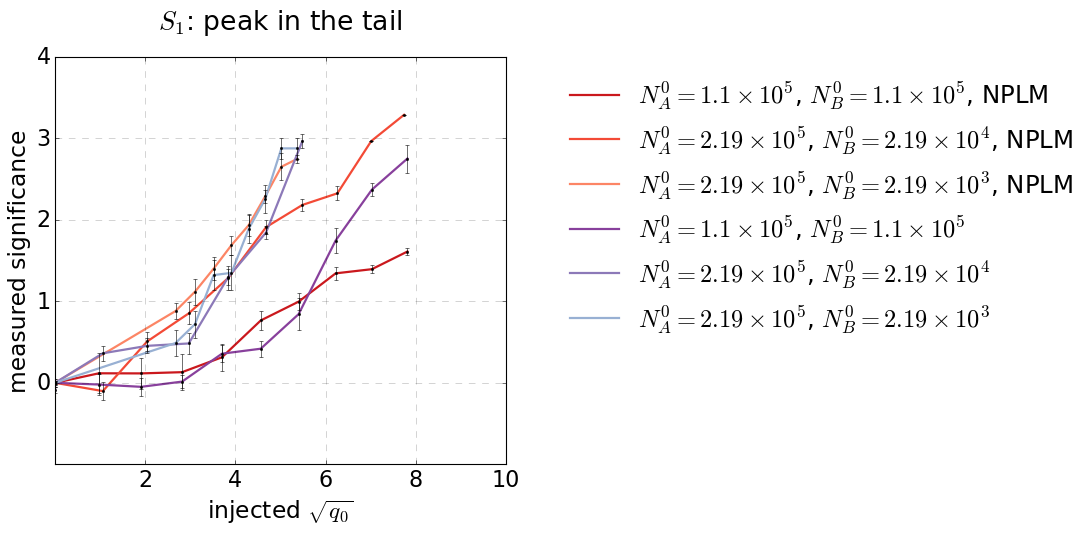

In [8]:
SYM_Nonewc_1_2_1_2 = au.exp_results('exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:2Ref_1:2Bkg.csv')
NPLM_9wc_1_2_1_2 = au.exp_results('exp500000epochs_tau500000epochs_deltaTrueNPLMTrueN_poiss0signals_1:2Ref_1:2Bkg.csv')
SYM_Nonewc_1_1_10 = au.exp_results('exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:10Bkg.csv')
NPLM_9wc_1_1_10 = au.exp_results('exp500000epochs_tau500000epochs_deltaTrueNPLMTrueN_poiss0signals_1Ref_1:10Bkg.csv')
SYM_Nonewc_1_1_100 = au.exp_results('exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:100Bkg.csv')
NPLM_9wc_1_1_100 = au.exp_results('exp500000epochs_tauTrueNPLMTrueN_poiss0signals_1Ref_1:100Bkg.csv')
titles = [r"$S_1$: peak in the tail"]
ignore_files = ["exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant4signals_1Ref_1:100Bkg.csv","exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant15signals_1Ref_1:100Bkg.csv"]
pu.exp_multiple_performance_plot([NPLM_9wc_1_2_1_2,NPLM_9wc_1_1_10,NPLM_9wc_1_1_100,SYM_Nonewc_1_2_1_2,SYM_Nonewc_1_1_10,SYM_Nonewc_1_1_100],[1],title=titles,legend_fs=22,errors=True,ignore_files=ignore_files,save=True,saved_file_name='performance_plot_exp_remastered_symmetrical_errors_NPLM+SYM_nochi2',save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant300signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant40signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant10signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant70signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant400signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant50signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant30signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLMTrueN_poiss0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant60signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissT

/srv01/agrp/yuvalzu/scripts/NPLM_package/new_plot_utils.py:396: RuntimeWarning: invalid value encountered in subtract
  errors_array = np.concatenate((Z_score_m.reshape(1,-1),Z_score_p.reshape(1,-1)),axis=0)
/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


exp500000epochs_tau500000epochs_deltaTrueNPLMTrueN_poiss0signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant25signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant5signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant20signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant10signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant45signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant40signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant35signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant15signals_1Ref_1:10Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant3

/usr/local/anaconda/3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


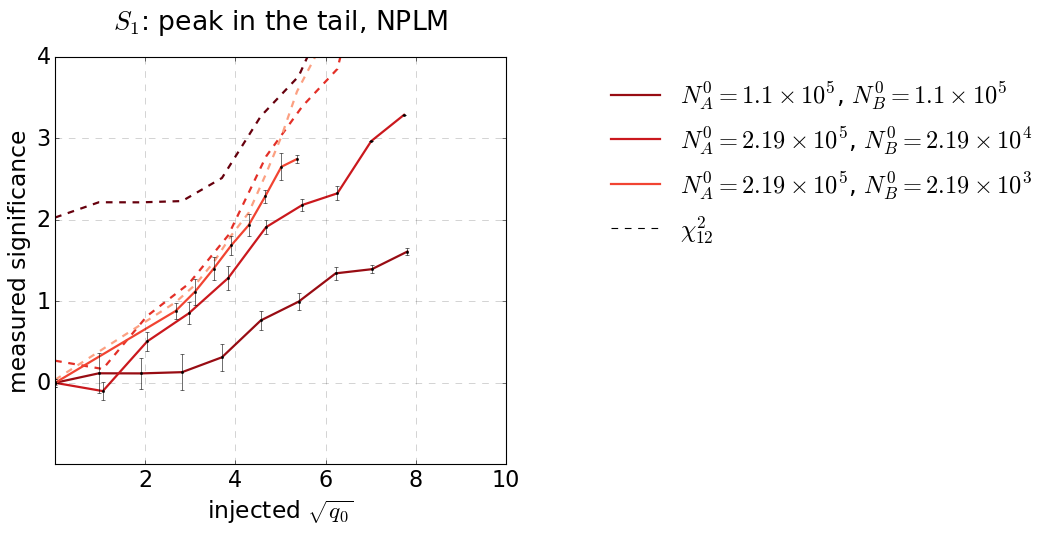

In [64]:
titles = [r"$S_1$: peak in the tail, NPLM"]
ignore_files = ["exp500000epochs_tau500000epochs_deltaTrueNPLM6.4Sig_locTrueN_poissTrueresonant15signals_1Ref_1:100Bkg.csv"]
pu.exp_multiple_performance_plot([NPLM_9wc_1_2_1_2,NPLM_9wc_1_1_10,NPLM_9wc_1_1_100],[1],title=titles,legend_fs=22,errors=True,ignore_files=ignore_files,save=True,saved_file_name='performance_plot_exp_remastered_symmetrical_errors_NPLM',save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

In [9]:
NPLM_Nonewc_1_2_1_2 = au.exp_results('exp500000epochs_tau500000epochs_deltaTrueNPLMNoneBSMweight_clippingTrueN_poiss0signals_1:2Ref_1:2Bkg.csv')
NPLM_9wc_1_2_1_2 = au.exp_results('exp500000epochs_tau500000epochs_deltaTrueNPLMTrueN_poiss0signals_1:2Ref_1:2Bkg.csv')
SYM_Nonewc_1_2_1_2 = au.exp_results('exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:2Ref_1:2Bkg.csv')

exp500000epochs_tau500000epochs_deltaTrueNPLMNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant80signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLMNoneBSMweight_clippingTrueN_poiss0signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLMNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant275signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLMNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant400signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLMNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant600signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLMNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant1000signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLMNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant70signals_1:2Ref_1:2Bkg.csv
exp500000epochs_tau500000epochs_deltaTrueNPLMNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant500signals_1:2Ref_1:2B

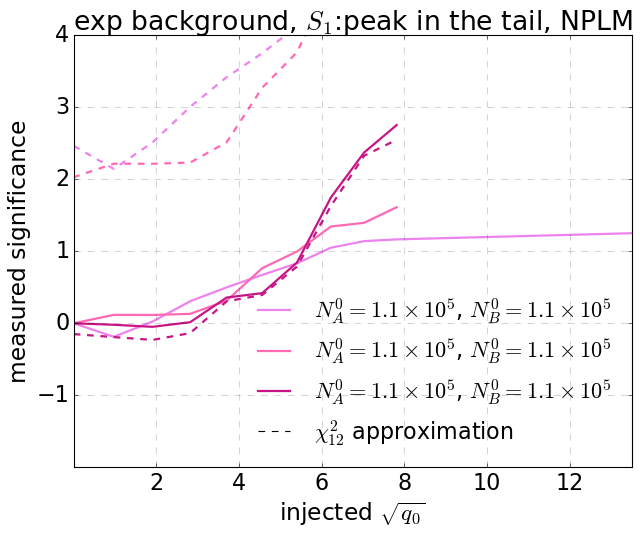

In [10]:
pu.exp_performance_plot([NPLM_Nonewc_1_2_1_2,NPLM_9wc_1_2_1_2,SYM_Nonewc_1_2_1_2],1,title=r"exp background, $S_1$:peak in the tail, NPLM",save=False,saved_file_name='performance_plot_exp_s1_remastered',save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant80signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau500patience_tau500000epochs_delta500patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant60signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant20signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant50signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau2000patience_tau500000epochs_delta2000patience_deltaNoneBSMweight_clipping6.4

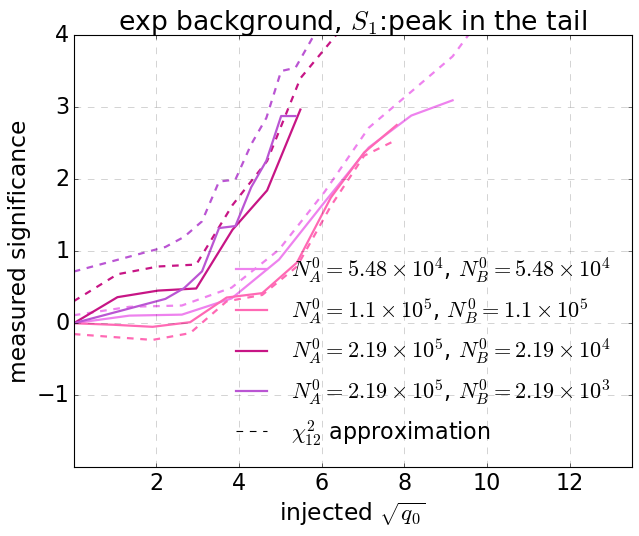

In [101]:
pu.exp_performance_plot(exps,1,title=r"exp background, $S_1$:peak in the tail",save=False,saved_file_name='performance_plot_exp_s1_remastered',save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissFalseresonant600signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissFalseresonant1000signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissFalseresonant500signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissFalseresonant900signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissFalseresonant300signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissFalseresonant800signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau500patience_tau500000epochs_delta500patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:4Ref_1:4Bkg.csv
exp50000

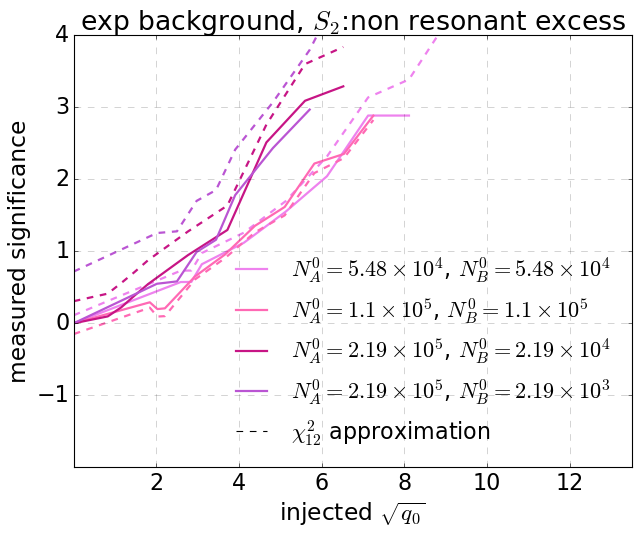

In [102]:
pu.exp_performance_plot(exps,2,title=r"exp background, $S_2$:non resonant excess",save=False,saved_file_name='performance_plot_exp_s2_remastered',save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

exp500000epochs_tau500patience_tau500000epochs_delta500patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant300signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau500patience_tau500000epochs_delta500patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant800signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau500patience_tau500000epochs_delta500patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau500patience_tau500000epochs_delta500patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant500signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau500patience_tau500000epochs_delta500patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant600signals_1:4Ref_1:4Bkg.csv
exp500000epochs_tau500patience_tau500000epochs_delta500patience_deltaNoneBSMweight_clipping1.6Sig_lo

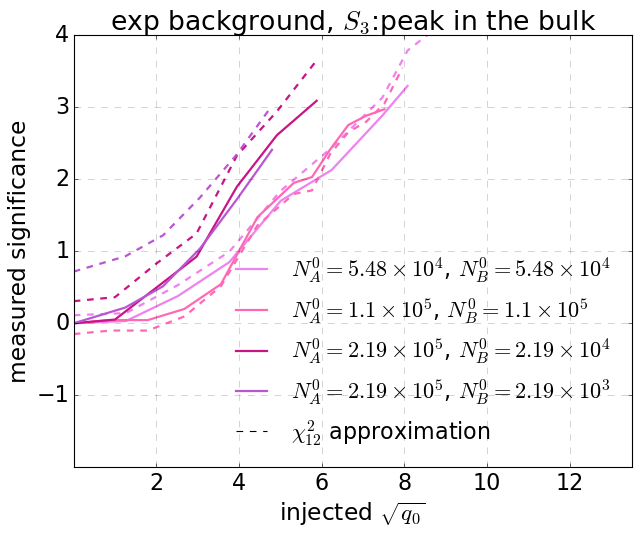

In [103]:
pu.exp_performance_plot(exps,3,title=r"exp background, $S_3$:peak in the bulk",save=False,saved_file_name='performance_plot_exp_s3_remastered',save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

In [89]:
no_permute_bkg = au.exp_results('exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant0signals_1:4Ref_1:4Bkg.csv')

$5.48\times {10}^{4}$
$5.48\times {10}^{4}$


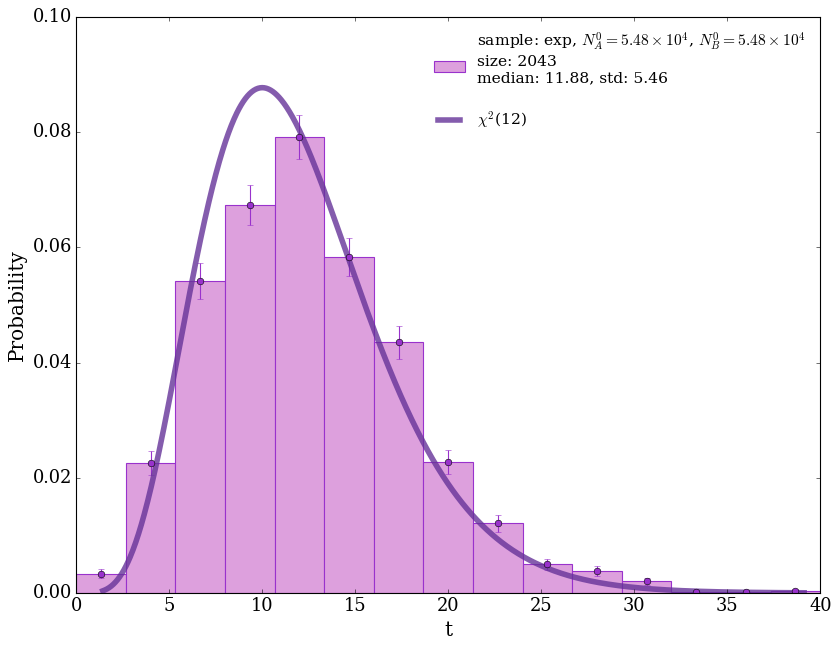

In [20]:
pu.plot_t_distribution(no_permute_bkg,12,nbins=15,xmax=40,save=True,file_name='no_permute_bkg_only',save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

In [4]:
permute_bkg = au.exp_results('exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissFalseresonantTrueresamplepermutelabel_methodfixedN_methodTruereplacement23910original_seed0signals_1:4Ref_1:4Bkg.csv')

$5.48\times {10}^{4}$
$5.48\times {10}^{4}$


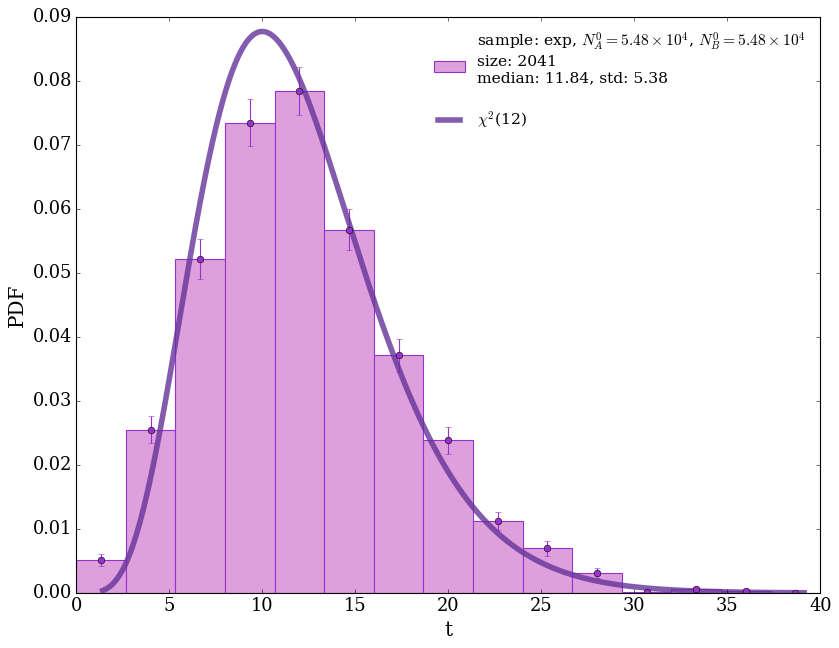

In [5]:
pu.plot_t_distribution(permute_bkg,12,nbins=15,xmax=40,save=True,file_name='permute_bkg_only',save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

In [25]:
no_permute_500_sig = au.exp_results('exp500000epochs_tau500patience_tau500000epochs_delta500patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant500signals_1:4Ref_1:4Bkg.csv')

$5.48\times {10}^{4}$
$5.48\times {10}^{4}$


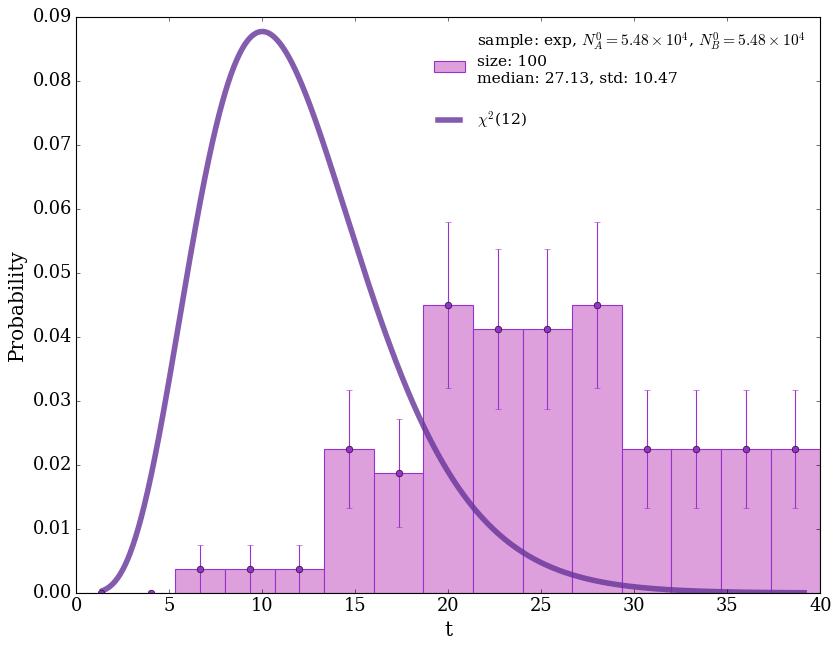

In [26]:
pu.plot_t_distribution(no_permute_500_sig,12,nbins=15,xmax=40,save=True,file_name='no_permute_500_sig',save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

In [27]:
permute_500_sig = au.exp_results('exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonantTrueresamplepermutelabel_methodfixedN_methodTruereplacement84152original_seed500signals_1:4Ref_1:4Bkg.csv')

$5.48\times {10}^{4}$
$5.48\times {10}^{4}$


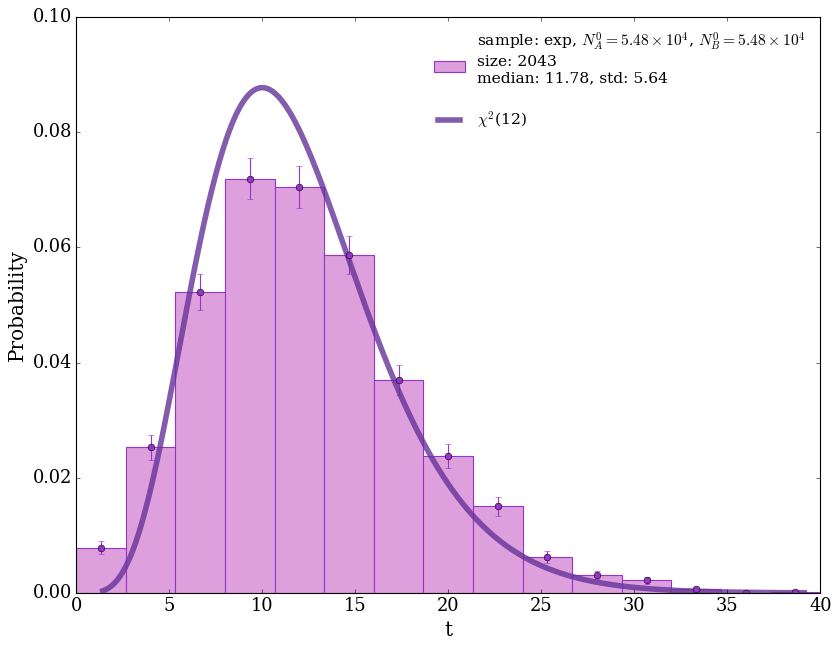

In [28]:
pu.plot_t_distribution(permute_500_sig,12,nbins=15,xmax=40,save=True,file_name='permute_500_sig',save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

In [5]:
no_permute_300_sig = au.exp_results('exp500000epochs_tau500patience_tau500000epochs_delta500patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonant300signals_1:4Ref_1:4Bkg.csv')

$5.48\times {10}^{4}$
$5.48\times {10}^{4}$


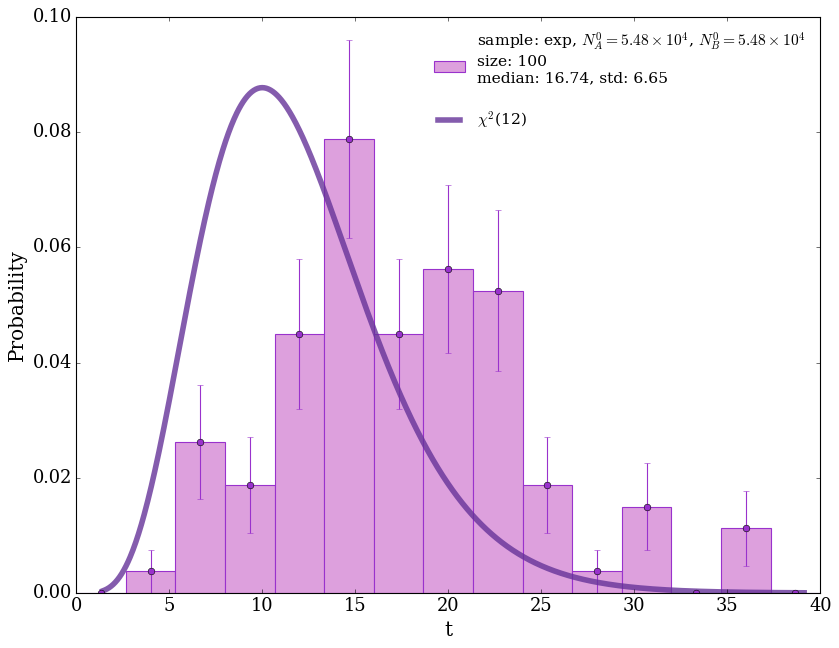

In [6]:
pu.plot_t_distribution(no_permute_300_sig,12,nbins=15,xmax=40,save=True,file_name='no_permute_300_sig',save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

In [7]:
permute_300_sig = au.exp_results('exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping1.6Sig_locTrueN_poissTrueresonantTrueresamplepermutelabel_methodfixedN_methodTruereplacement31664original_seed300signals_1:4Ref_1:4Bkg.csv')

$5.48\times {10}^{4}$
$5.48\times {10}^{4}$


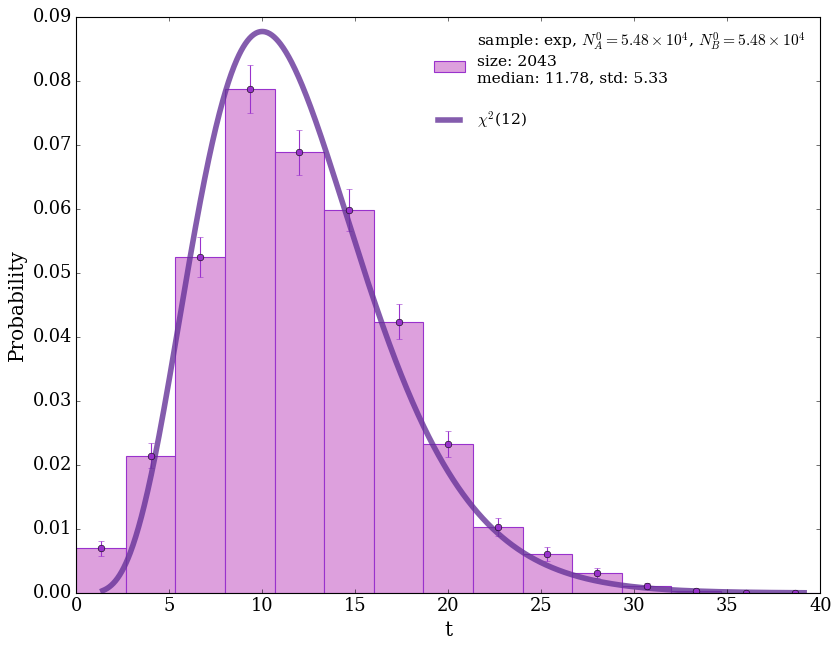

In [9]:
pu.plot_t_distribution(permute_300_sig,12,nbins=15,xmax=40,save=True,file_name='permute_300_sig',save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/')

$1.1\times {10}^{5}$
$1.1\times {10}^{5}$


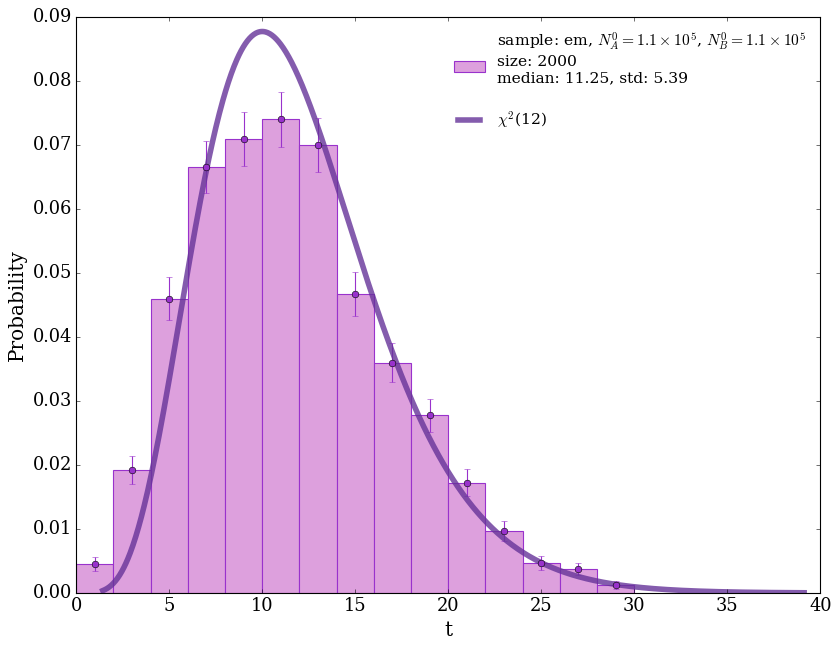

In [4]:
pu.plot_t_distribution(bkg_check,12,nbins=15,xmax=30)

$8.22\times {10}^{4}$
$8.22\times {10}^{4}$


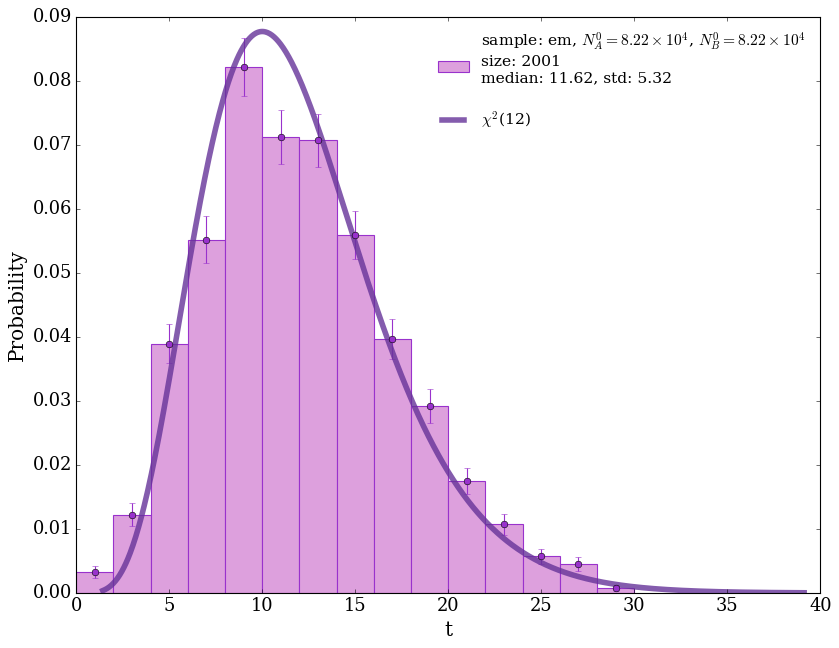

In [5]:
pu.plot_t_distribution(bkg_check2,12,nbins=15,xmax=30)

$5.48\times {10}^{4}$
$5.48\times {10}^{4}$


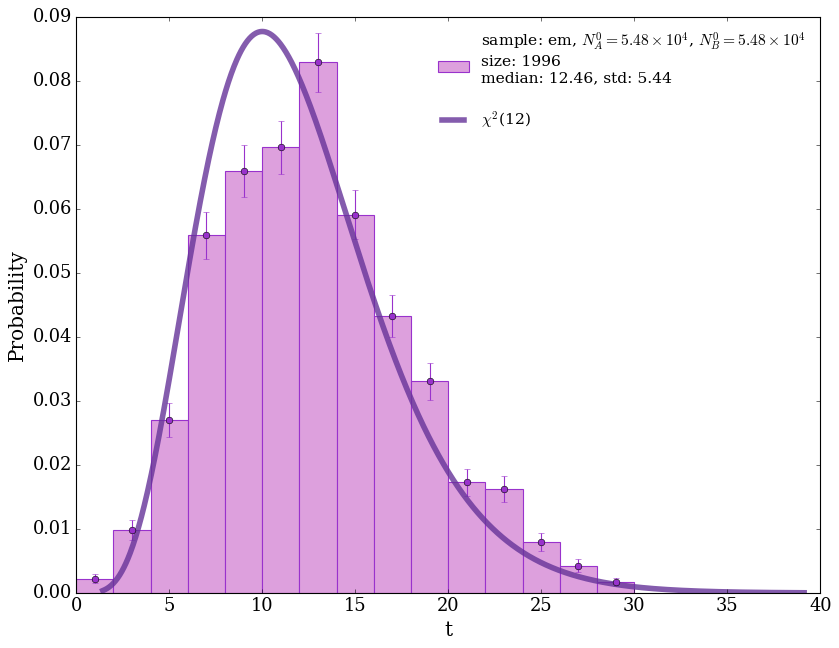

In [6]:
pu.plot_t_distribution(bkg_check3,12,nbins=15,xmax=30)

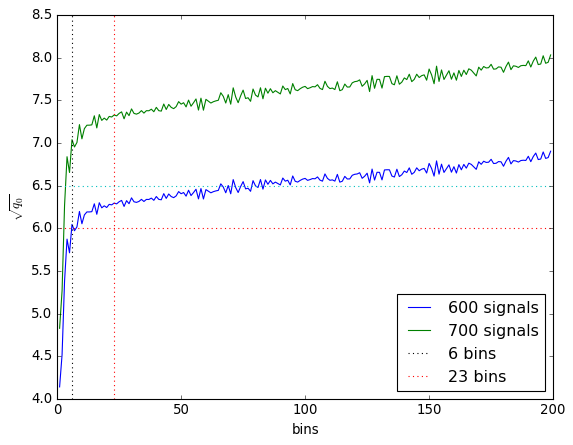

In [18]:
import matplotlib.pyplot as plt, numpy as np
sig_check_600 = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss600signals_1:2Ref_1:2Bkg.csv')
sig_check_700 = au.em_results('em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss700signals_1:2Ref_1:2Bkg.csv')
bins = range(1,200)
plt.figure(facecolor='white')
plt.plot(bins,[sig_check_600.get_sqrt_q0(Data_bins=i) for i in bins],label='600 signals')
plt.plot(bins,[sig_check_700.get_sqrt_q0(Data_bins=i) for i in bins],label='700 signals')
plt.plot(bins,6*np.ones(len(bins)),linestyle='dotted')
plt.plot(bins,6.5*np.ones(len(bins)),linestyle='dotted')
plt.vlines(6,4,8.5,linestyles='dotted',label='6 bins',color='black')
plt.vlines(23,4,8.5,linestyles='dotted',label='23 bins',color='red')
plt.ylim(4,8.5)
plt.xlabel('bins')
plt.ylabel(r'$\sqrt{q_0}$')
plt.legend(loc = 'lower right')
plt.show()

(array([ 1.,  3.,  5.,  7.,  8., 28., 39., 41., 83., 64., 54., 42., 21.,
        20., 11., 13.,  4.,  6.,  1.,  2.,  1.,  1.,  1.]),
 array([ 96281.86814873,  99385.457031  , 102489.04591328, 105592.63479556,
        108696.22367783, 111799.81256011, 114903.40144238, 118006.99032466,
        121110.57920694, 124214.16808921, 127317.75697149, 130421.34585376,
        133524.93473604, 136628.52361832, 139732.11250059, 142835.70138287,
        145939.29026514, 149042.87914742, 152146.4680297 , 155250.05691197,
        158353.64579425, 161457.23467652, 164560.8235588 , 167664.41244108]),
 <BarContainer object of 23 artists>)

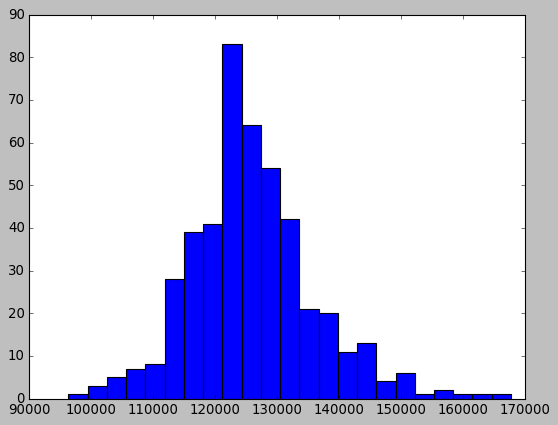

In [60]:
import numpy as np
signal = np.concatenate((np.load(f"/storage/agrp/yuvalzu/NPLM/em_ggH_taue_signal_Mcoll_dist.npy"),np.load(f"/storage/agrp/yuvalzu/NPLM/em_vbfH_taue_signal_Mcoll_dist.npy")),axis=0)
plt.figure()
plt.hist(signal,bins=23)
# plt.hist(signal,bins=200)

In [5]:
bkg = au.em_results('em500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_3:8Ref_3:8Bkg.csv')
bkg2 = au.em_results('em500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1:2Ref_1:2Bkg.csv')
bkg3 = au.exp_results('exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:100Bkg.csv')
bkg4 = au.exp_results('exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:10Bkg.csv')
sig = au.em_results('em500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss1200signals_3:8Ref_3:8Bkg.csv')


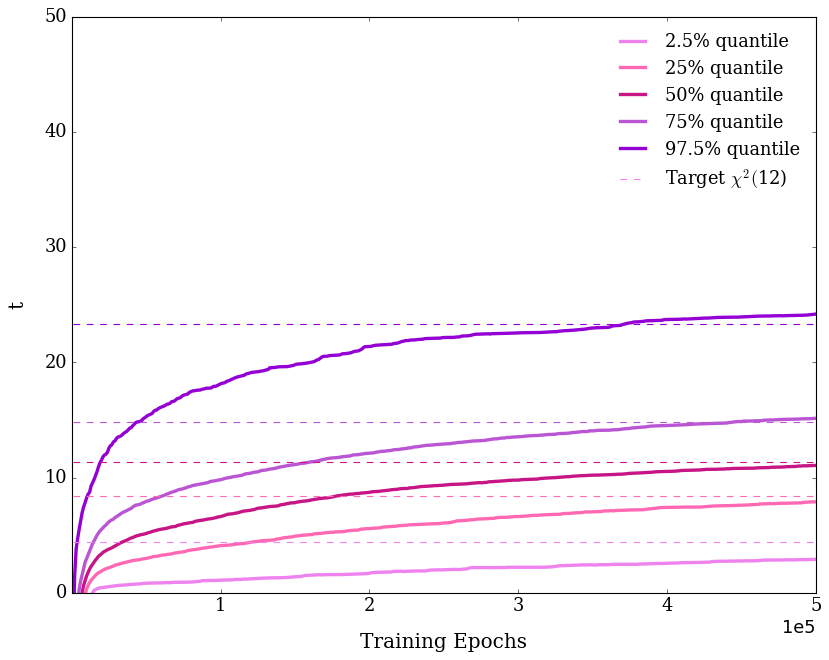

<Figure size 640x480 with 0 Axes>

In [6]:
pu.Plot_Percentiles_ref(bkg,12,ymax=50, xmax=1500000)

In [34]:
exp_with_1500000_1_2_1_2 = au.exp_results("exp1500000epochs_tau1500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1:2Ref_1:2Bkg.csv")

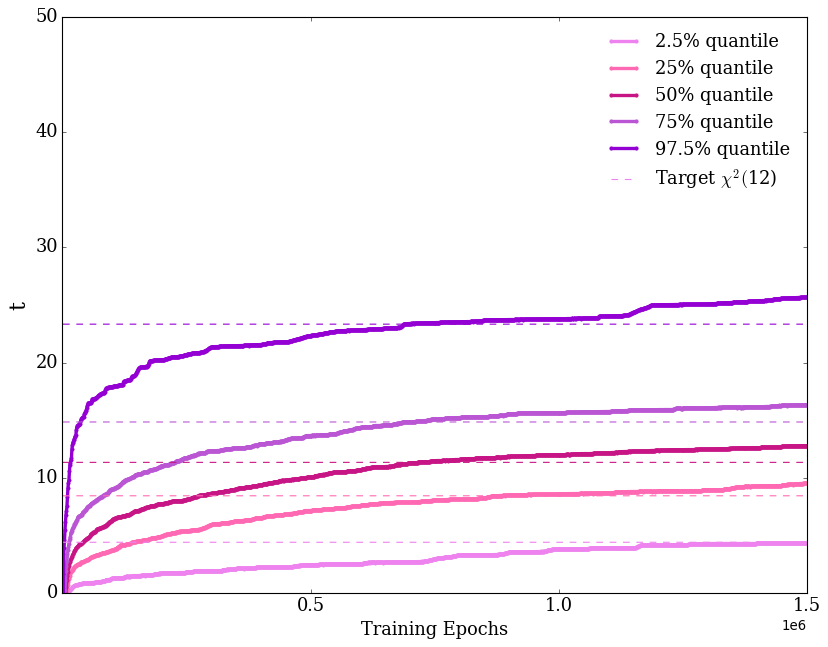

<Figure size 640x480 with 0 Axes>

In [35]:
pu.Plot_Percentiles_ref(exp_with_1500000_1_2_1_2,12,ymax=50,xmax=1500000, save=True, save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/', file_name='Percentiles_plot_1:2_1:2')

In [36]:
exp_with_1500000_1_4_1_4 = au.exp_results("exp1500000epochs_tau1500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1:4Ref_1:4Bkg.csv")

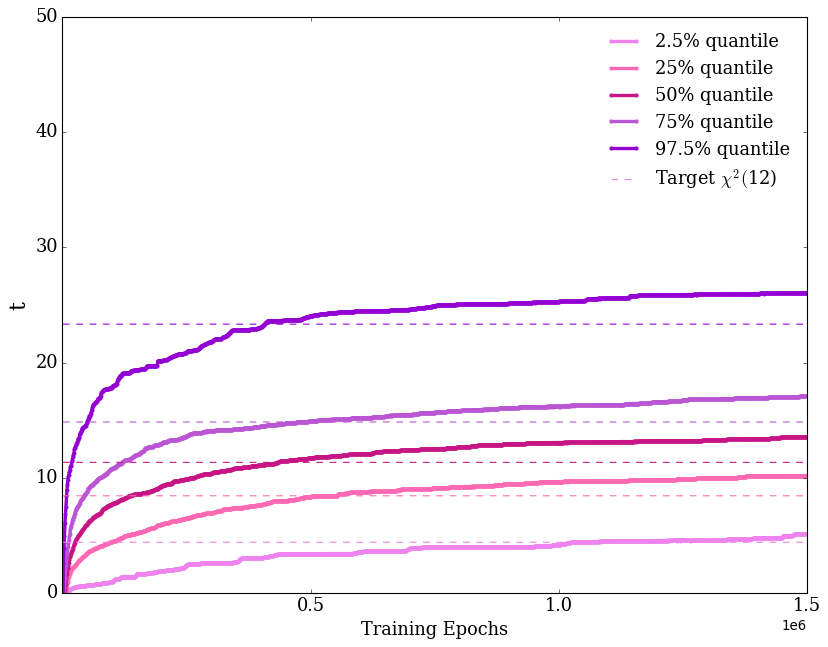

<Figure size 640x480 with 0 Axes>

In [37]:
pu.Plot_Percentiles_ref(exp_with_1500000_1_4_1_4,12,ymax=50,xmax=1500000, save=True, save_path='/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/', file_name='Percentiles_plot_1:4_1:4')

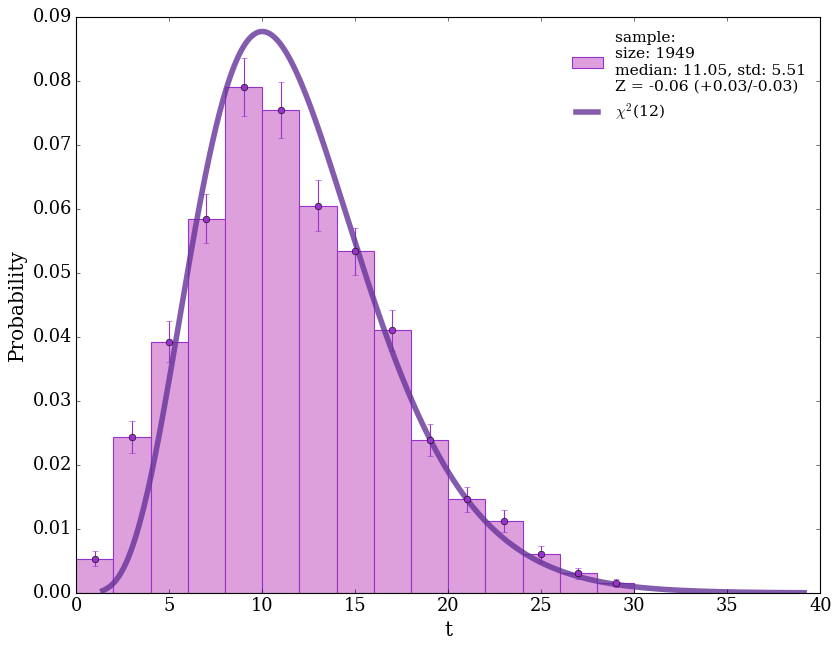

In [5]:
pu.plot_t_distribution(bkg,12,nbins=15,xmax=30)

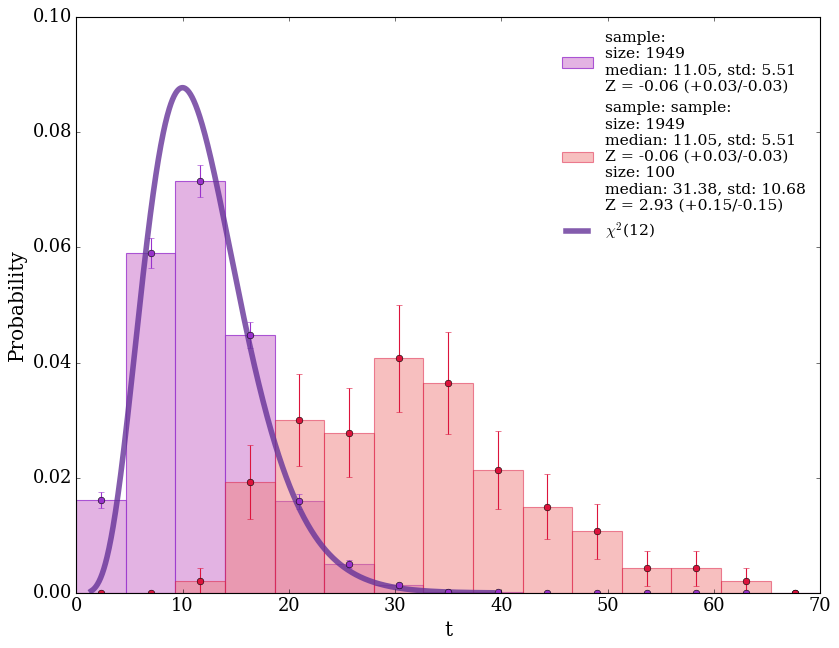

In [6]:
pu.plot_t_2distributions(bkg,sig,12,nbins=15,xmax=70)

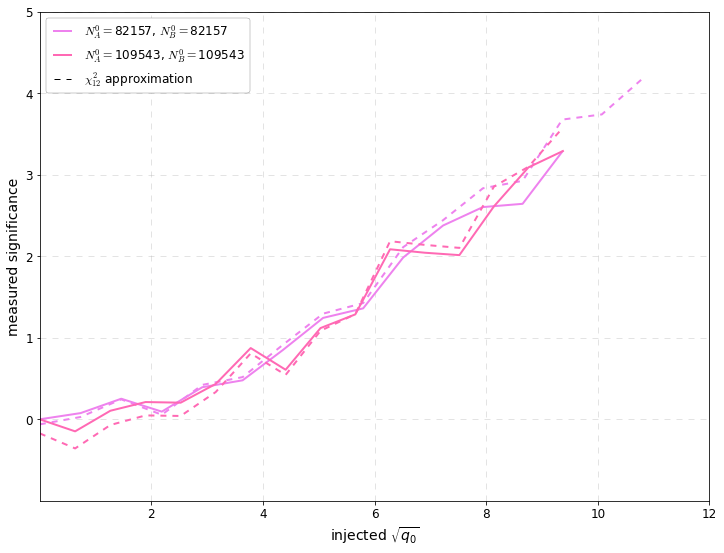

In [3]:
pu.em_performance_plot([bkg,bkg2])

exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant9signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant5signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant8signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant6signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant20signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clipping6.4Sig_locTrueN_poissTrueresonant12signals_1Ref_1:100Bkg.csv
exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBS

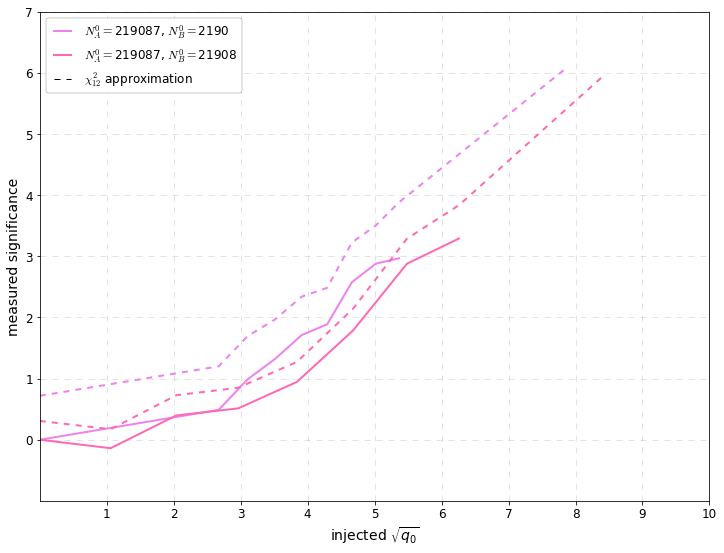

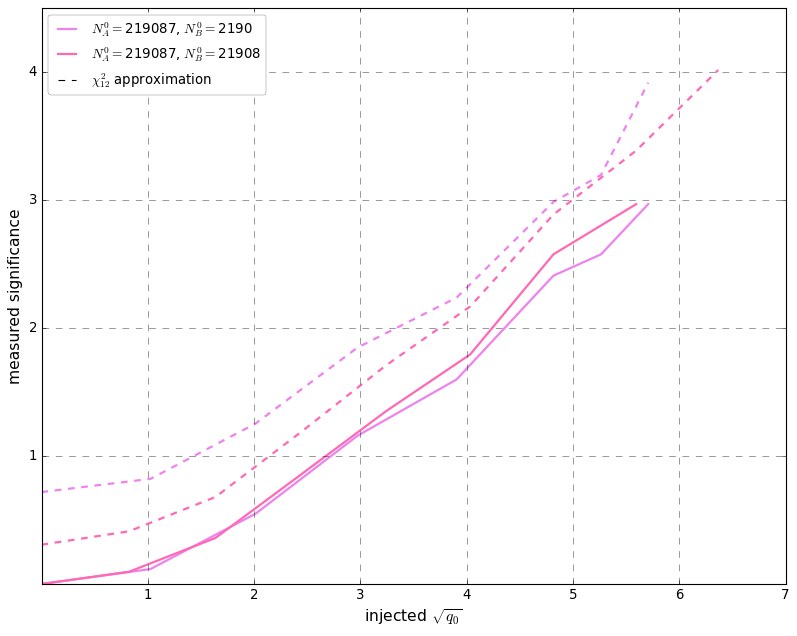

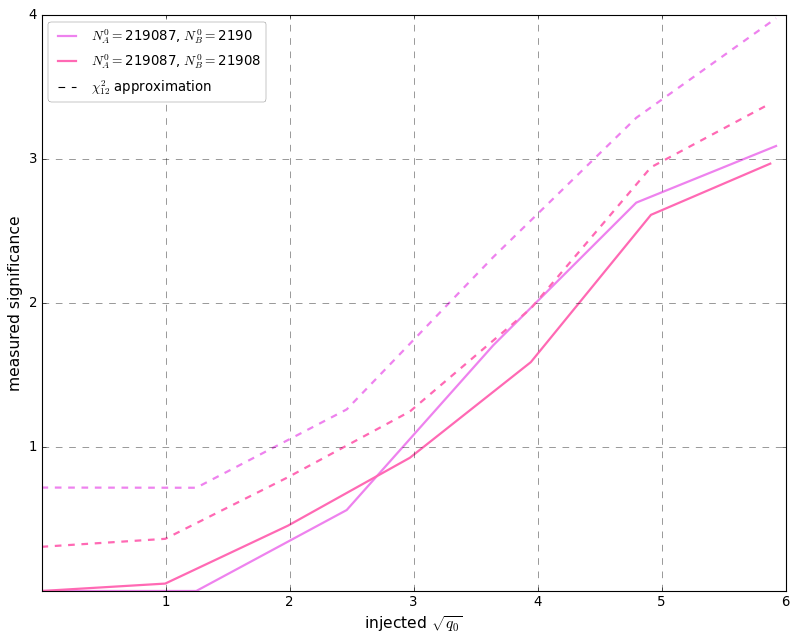

In [3]:
pu.exp_performance_plot([bkg3,bkg4],1)
pu.exp_performance_plot([bkg3,bkg4],2)
pu.exp_performance_plot([bkg3,bkg4],3)


In [6]:
check_background = au.exp_results('exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:10Bkg.csv')
check_signals_50 = au.exp_results('exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poissFalseresonant50signals_1Ref_1:10Bkg.csv')
check_signals_70 = au.exp_results('exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poissFalseresonant70signals_1Ref_1:10Bkg.csv')
check_signals_90 = au.exp_results('exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poissFalseresonant90signals_1Ref_1:10Bkg.csv')
check_signals_110 = au.exp_results('exp500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poissFalseresonant110signals_1Ref_1:10Bkg.csv')
print(au.get_z_score(check_signals_50, check_background))
print(au.get_z_score(check_signals_70, check_background))
print(au.get_z_score(check_signals_90, check_background))
print(au.get_z_score(check_signals_110, check_background))


(0.09539636905689206, array([13.412361, 12.760867,  9.274219, 11.460973, 23.379322, 24.765605,
       16.851109, 20.462417,  6.522276, 12.701337, 13.675766, 12.870322,
       21.653596, 14.22468 , 18.991853,  6.985387,  7.448463, 10.230349,
       10.822715,  8.431375,  7.486421,  7.939968, 18.921885, 16.358627,
       11.190691, 14.779672, 14.512231,  8.436028, 10.780175, 13.027169,
       14.456009, 18.411377, 14.921133, 15.372304, 13.396532, 11.792285,
        7.641877, 21.436978, 24.546235, 21.73448 , 25.029769, 12.853122,
       14.662813, 15.52591 , 16.825787, 18.861888, 11.988337, 15.66579 ,
       15.960208, 22.355741, 17.616846,  6.804242,  6.551408, 10.963177,
       10.62642 , 21.126818,  8.16915 , 19.676572,  9.636738,  3.913392,
       17.280842, 13.538423, 10.247407,  9.942068, 12.940094, 14.151621,
       15.354972, 24.707026, 11.790536, 19.096463,  7.481965, 14.528577,
       13.486862,  6.131322,  6.540474, 29.134981, 10.726663, 17.545707,
       17.922064, 16.899544, 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
channel='em'
signal_samples=["ggH_taue","vbfH_taue"]
background = {}
signal = {}
background["em_background"] = np.load("/storage/agrp/yuvalzu/NPLM/em_Mcoll_dist.npy")
for s in signal_samples:
    signal[f"{s}_em_signal"] = np.load(f"/storage/agrp/yuvalzu/NPLM/em_{s}_signal_Mcoll_dist.npy")
Bkg = background["em_background"]
Sig = np.concatenate((signal["ggH_taue_em_signal"],signal["vbfH_taue_em_signal"]),axis=0)
Sig_plus_Bkg = np.concatenate((signal["ggH_taue_em_signal"],signal["vbfH_taue_em_signal"],Bkg),axis=0)

(array([  157.,   349.,   478.,   716.,   873.,  1008.,  1381.,  2783.,
         5126.,  8054., 10901., 13137., 14682., 15362., 14653., 12930.,
        10196.,  7412.,  5224.,  3962.,  3426.,  3159.,  2956.,  3082.,
         2812.,  2823.,  2748.,  2668.,  2674.,  2579.,  2577.,  2469.,
         2420.,  2295.,  2289.,  2266.,  2126.,  2117.,  1947.]),
 array([  2500,   7500,  12500,  17500,  22500,  27500,  32500,  37500,
         42500,  47500,  52500,  57500,  62500,  67500,  72500,  77500,
         82500,  87500,  92500,  97500, 102500, 107500, 112500, 117500,
        122500, 127500, 132500, 137500, 142500, 147500, 152500, 157500,
        162500, 167500, 172500, 177500, 182500, 187500, 192500, 197500]),
 <BarContainer object of 39 artists>)

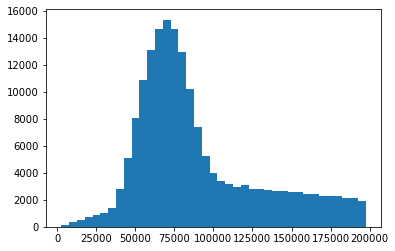

In [15]:
plt.hist(Bkg,np.arange(2500,200000,5000))

In [7]:
print(np.min(Sig_plus_Bkg),np.max(Sig_plus_Bkg))
print(Sig_plus_Bkg[Sig_plus_Bkg>1000000].shape)
print(np.min(Sig),np.max(Sig))

741.921725342926 2033195.2112698306
(62,)
96281.86814872824 167664.4124410752


In [8]:
print(np.histogram(Sig,bins=np.arange(95000, 170001, 5000)))

(array([  1,   8,  10,  33,  62, 119,  98,  58,  28,  21,  10,   3,   3,
         1,   1]), array([ 95000, 100000, 105000, 110000, 115000, 120000, 125000, 130000,
       135000, 140000, 145000, 150000, 155000, 160000, 165000, 170000]))


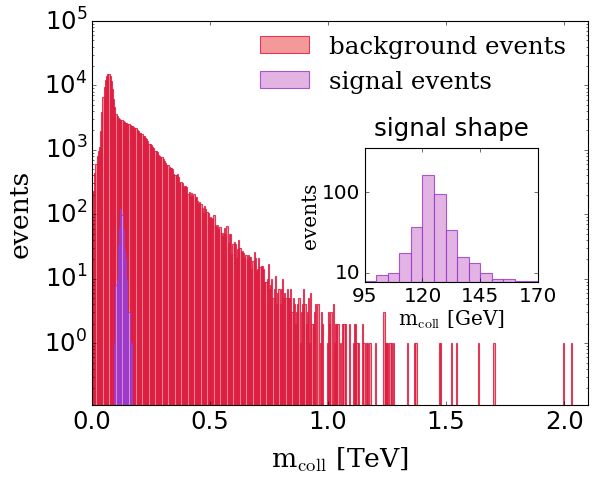

In [27]:
save = True
save_path = '/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/'
file_name = 'em_Mcoll'

color1 = ['plum', 'darkorchid']
color2 = ['lightcoral', 'crimson']
alpha = [0.8, 0.5]
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
fig  = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.5, box.height*0.5])
fig.patch.set_facecolor('white')
bins = np.arange(0, 2.050001, 0.005000)
ax.hist(Bkg/1e6, color=color2[0], ec=color2[1], bins=bins, label='background events', alpha=alpha[0])
ax.hist(Sig/1e6, color=color1[0], ec=color1[1], bins=bins, label='signal events', alpha=alpha[0])
font = font_manager.FontProperties(family='serif', size=22)
legend = ax.legend(prop=font,frameon=False, bbox_to_anchor=(1, 1.02), bbox_transform=ax.transAxes)
xlabel = ax.set_xlabel(r'm$_{\mathrm{coll}}$ [TeV]', fontsize=24, fontname="serif", labelpad=10)
ax.set_ylabel('events', fontsize=24, fontname="serif", labelpad=10)
ax.set_yticks(ticks=[1,10,100,1000,10000,100000])
ax.set_xticks(ticks=[0,0.5,1,1.5,2])
ax.tick_params(axis='both', which='major', labelsize=22)
ticks_offset_text = ax.xaxis.get_offset_text()
ticks_offset_text.set_fontsize(18)
ax.set_xlim(0,2.1)
ax.set_ylim(0.11,100000)
ax.set_yscale('log')
# ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0))
minor = ax.inset_axes([0.55, 0.32, 0.35, 0.35])
minor_bins = np.arange(95, 170.001, 5)
minor.hist(Sig/1e3, color=color1[0], ec=color1[1], bins=minor_bins, alpha=alpha[0],log=False)
minor.set_xlabel(r'm$_{\mathrm{coll}}$ [GeV]', fontsize=18, fontname="serif", labelpad=2)
minor.set_ylabel('events', fontsize=18, fontname="serif", labelpad=2)
minor.set_xlim(95,170)
minor.set_ylim(0.11,150)
minor.set_xticks(ticks=[95,120,145,170])
minor.set_yticks(ticks=[10,100])
minor.tick_params(axis='both', which='major', labelsize=18)
minor_ticks_offset_text = minor.xaxis.get_offset_text()
minor_ticks_offset_text.set_fontsize(16)
# minor.set_yscale('log')
minor.title.set_text('signal shape')
minor.title.set_fontsize(22)
minor_title_y_pos_offset = 0.05
x = minor.title.get_position()[0]
y = minor.title.get_position()[1]
minor.title.set_position([x, y+minor_title_y_pos_offset])
# minor.ticklabel_format(axis="x", style="scientific", scilimits=(0,0))
# plt.title(title, fontsize=18, fontname="serif")
if save:
    if save_path=='': print('argument save_path is not defined. The figure will not be saved.')
    else:
        if file_name=='': file_name = '2distribution'
        else: file_name += '_2distribution'
        plt.savefig(save_path+file_name+'.pdf')
plt.show()
plt.close(fig)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
channel='em'
signal_samples=["ggH_taue","vbfH_taue"]
background = {}
signal = {}
background["em_background"] = np.load("/storage/agrp/yuvalzu/NPLM/em_MLL_dist.npy")
for s in signal_samples:
    signal[f"{s}_em_signal"] = np.load(f"/storage/agrp/yuvalzu/NPLM/em_{s}_signal_MLL_dist.npy")
Bkg = background["em_background"]
Sig = np.concatenate((signal["ggH_taue_em_signal"],signal["vbfH_taue_em_signal"]),axis=0)
Sig_plus_Bkg = np.concatenate((signal["ggH_taue_em_signal"],signal["vbfH_taue_em_signal"],Bkg),axis=0)

In [7]:
print(Bkg[Bkg>120000])
print(len(Bkg[Bkg>120000]))
print('std= ', np.std(Bkg))
print('mean= ', np.mean(Bkg))

[456023.5399526  155593.63254172 167882.04495327 ... 195336.24509345
 131062.1418782  165227.2590459 ]
38931
std=  63447.48226098203
mean=  82832.44083246149


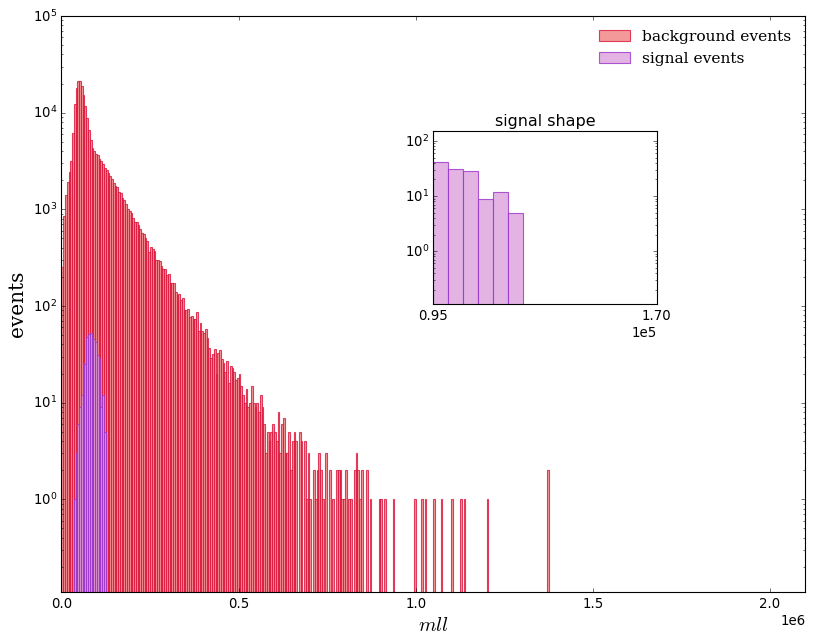

In [3]:
save = False
save_path = '/srv01/agrp/yuvalzu/scripts/NPLM_package/plots/'
file_name = 'em_Mcoll'

color1 = ['plum', 'darkorchid']
color2 = ['lightcoral', 'crimson']
alpha = [0.8, 0.5]
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
fig  = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
fig.patch.set_facecolor('white')
bins = np.arange(0, 2050001, 5000)
ax.hist(Bkg, color=color2[0], ec=color2[1], bins=bins, label='background events', alpha=alpha[0])
ax.hist(Sig, color=color1[0], ec=color1[1], bins=bins, label='signal events', alpha=alpha[0])
font = font_manager.FontProperties(family='serif', size=14)
ax.legend(prop=font,frameon=False)
ax.set_xlabel(r'$mll$', fontsize=18, fontname="serif")
ax.set_ylabel('events', fontsize=18, fontname="serif")
ax.set_yticks(fontsize=16, fontname="serif", ticks=[1,10,100,1000,10000,100000])
ax.set_xticks(fontsize=16, fontname="serif", ticks=[0,500000,1000000,1500000,2000000])
ax.set_xlim(0,2100000)
ax.set_ylim(0.11,100000)
ax.set_yscale('log')
ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0))
minor = ax.inset_axes([0.5, 0.5, 0.3, 0.3])
minor_bins = np.arange(95000, 170001, 5000)
minor.hist(Sig, color=color1[0], ec=color1[1], bins=minor_bins, alpha=alpha[0],log=True)
minor.set_xlim(95000,170000)
minor.set_ylim(0.11,150)
minor.set_xticks(fontsize=16, fontname="serif", ticks=[95000,170000])
minor.set_yticks(fontsize=16, fontname="serif", ticks=[1,10,100])
minor.set_yscale('log')
minor.title.set_text('signal shape')
minor.ticklabel_format(axis="x", style="scientific", scilimits=(0,0))
# plt.title(title, fontsize=18, fontname="serif")
if save:
    if save_path=='': print('argument save_path is not defined. The figure will not be saved.')
    else:
        if file_name=='': file_name = '2distribution'
        else: file_name += '_2distribution'
        plt.savefig(save_path+file_name+'.pdf')
plt.show()
plt.close(fig)

In [21]:
import pandas as pd
import numpy as np
import json

In [51]:
# create a dataframe with pandas
df = pd.DataFrame({'channel':['em','em','em','me','em'],
                   'phys_var':['Mcoll','MLL','Mcoll','MLL','Mcoll'],
                   'ref_ratio':['1','1','1:2','1','1'],
                   'bkg_ratio':['1:10','1:100','1:2','1:10','1:1000'],
                   'csv_files':['em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:10Bkg.csv','em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:100Bkg.csv','exp1500000epochs_tau1500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1:2Ref_1:2Bkg.csv','me_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:10Bkg.csv','em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:1000Bkg.csv'],
                   'tar_files':['em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:10Bkg.tar.gz','em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:100Bkg.tar.gz','exp1500000epochs_tau1500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1:2Ref_1:2Bkg.tar.gz','me_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:10Bkg.tar.gz','em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:1000Bkg.tar.gz']})

In [33]:
df[df['tar_files']=='em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:10Bkg.tar.gz']

,channel,ref_ratio,bkg_ratio,csv_files,tar_files
0,em,1,1:10,em_Mcoll500000epochs_tau500000epochs_delta1000...,em_Mcoll500000epochs_tau500000epochs_delta1000...


In [35]:
df[df['tar_files']=='em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:10Bkg.tar.gz']['bkg_ratio'].values[0]

'1:10'

In [12]:
len('channel-emphys_variables-Mcollsignal_types-ggH_taue:vbfH_taueepochs_tau-500000epochs_delta-500000patience_delta-1000BSMweight_clipping-NoneN_poiss-True0signals_1:2Ref_1:2Bkg_job941_seed343110_delta.txt')

201

In [70]:
parameters_list = df.columns.values.tolist()
ignore = ['bkg_ratio','csv_files','tar_files']
parameters_list = [i for i in parameters_list if i not in ignore]
file_name = 'em_Mcoll500000epochs_tau500000epochs_delta1000patience_deltaNoneBSMweight_clippingTrueN_poiss0signals_1Ref_1:10Bkg.tar.gz'
file_settings = df[df['tar_files']==file_name]
similar_files = df[df[parameters_list].eq(file_settings[parameters_list].values[0]).all(axis=1)]['tar_files'].values.tolist()
#remove ".tar.gz" from the file names
similar_files = [file.split('.')[0] for file in similar_files]


In [23]:
val_dict = {'channel':'em','ref_ratio':''}

In [25]:
#show the csv_files column values for all rows with same values in the val_dict
print(np.array([df[col] == val for col,val in val_dict.items()]).all(0))
selected_rows = df[np.array([df[col] == val for col,val in val_dict.items()]).all(0)]


[False False False]


In [45]:
# get titles of df columns 
titles_list = df.columns.values.tolist()
remove = ['channel','ref_ratio']



['channel', 'ref_ratio', 'bkg_ratio', 'csv_files', 'tar_files']

In [26]:
selected_rows['csv_files'].values

array([], dtype=object)

In [3]:
import scipy.special as spc
import numpy as np
np.sqrt(2)*spc.erfinv(0.8)
spc.erf(2/np.sqrt(2))


0.9544997361036416

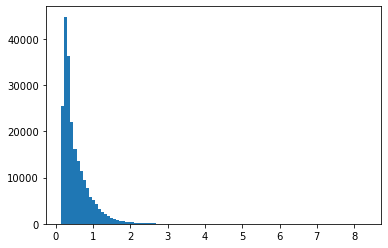

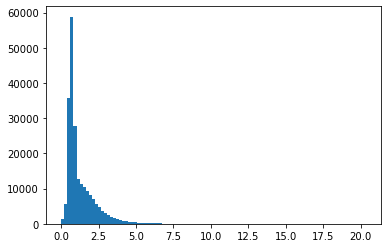

(array([[  127.,  1576., 15130., ...,     0.,     0.,     0.],
        [  229.,   642., 14132., ...,     0.,     0.,     0.],
        [  322.,   736.,  2578., ...,     0.,     0.,     0.],
        ...,
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.]]),
 array([0.15004917, 0.23163385, 0.31321854, 0.39480322, 0.4763879 ,
        0.55797259, 0.63955727, 0.72114195, 0.80272664, 0.88431132,
        0.965896  , 1.04748069, 1.12906537, 1.21065005, 1.29223474,
        1.37381942, 1.4554041 , 1.53698879, 1.61857347, 1.70015815,
        1.78174284, 1.86332752, 1.9449122 , 2.02649689, 2.10808157,
        2.18966625, 2.27125094, 2.35283562, 2.4344203 , 2.51600499,
        2.59758967, 2.67917435, 2.76075904, 2.84234372, 2.9239284 ,
        3.00551309, 3.08709777, 3.16868245, 3.25026714, 3.33185182,
        3.4134365 , 3.49502119, 3.57660587, 3.65819055, 3.73977

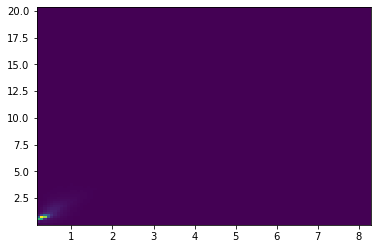

In [26]:
import numpy as np
Pt=np.load("/storage/agrp/yuvalzu/NPLM/em_Lep0Pt_dist.npy")
plt.hist(Pt/1e5,bins=100)
plt.show()
Mcoll=np.load("/storage/agrp/yuvalzu/NPLM/em_Mcoll_dist.npy")
plt.hist(Mcoll/1e5,bins=100)
plt.show()


(array([[0.03495891, 0.43382083, 4.16479006, ..., 0.        , 0.        ,
         0.        ],
        [0.06303615, 0.17672143, 3.89007357, ..., 0.        , 0.        ,
         0.        ],
        [0.08863598, 0.20259653, 0.70963839, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([0.15004917, 0.23163385, 0.31321854, 0.39480322, 0.4763879 ,
        0.55797259, 0.63955727, 0.72114195, 0.80272664, 0.88431132,
        0.965896  , 1.04748069, 1.12906537, 1.21065005, 1.29223474,
        1.37381942, 1.4554041 , 1.53698879, 1.61857347, 1.70015815,
        1.78174284, 1.86332752, 1.9449122 , 2.02649689, 2.10808157,
        2.18966625, 2.27125094, 2.35283562, 2.4344203 , 2.51600499,
 

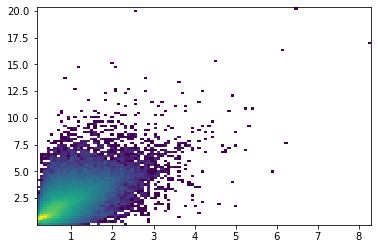

In [30]:
#plot in log scale
import matplotlib.colors as mcolors

plt.hist2d(Pt.reshape(-1,)/1e5,Mcoll.reshape(-1,)/1e5,bins=100,density=True,cmap='viridis',norm=mcolors.LogNorm())